In [79]:
## LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


randomseed = 1234

## DATA LOADING AND PREPROCESSING
# Load the data
gym = pd.read_csv('../../gym_members_exercise_tracking.csv')

# set 'Gender', 'Workout_Type', 'Workout_Frequency (days/week)' and 'Experience_Level' as categorical
for col in ['Gender', 'Workout_Type', 'Workout_Frequency (days/week)', 'Experience_Level']:
    gym[col] = gym[col].astype('category')

# log transform Weight and BMI
gym['Weight (kg)'] = np.log1p(gym['Weight (kg)'])

# transform 'Fat_Percentage'
max_fat = gym['Fat_Percentage'].max()
gym['Fat_Percentage'] = gym['Fat_Percentage'].apply(lambda x: np.sqrt(max_fat+1)-x)

# rename transformed columns
gym.rename(columns={'Weight (kg)': 'LWeight', 'Fat_Percentage': 'SFat_Percentage'}, inplace=True)

gym.drop(columns=['BMI'], inplace=True)

# divide into train and test set
gym_train, gym_test = train_test_split(gym, test_size=0.2, random_state=randomseed)

# Create gym_train_scale, gym_test_scale
gym_train_scale = gym_train.copy()
gym_test_scale = gym_test.copy()

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
gym_train_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']] = scaler.fit_transform(gym_train_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']])

gym_test_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']] = scaler.transform(gym_test_scale[['LWeight', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                             'Water_Intake (liters)', 'SFat_Percentage', 'Workout_Frequency (days/week)', 'Calories_Burned']])


# Create X_train_exp_level, X_test_exp_level, y_train_exp_level, y_test_exp_level
X_train_exp_level = gym_train.drop(columns=['Experience_Level'])
X_train_exp_level_scale = gym_train_scale.drop(columns=['Experience_Level'])
y_train_exp_level = gym_train['Experience_Level']
X_test_exp_level = gym_test.drop(columns=['Experience_Level'])
X_test_exp_level_scale = gym_test_scale.drop(columns=['Experience_Level'])
y_test_exp_level = gym_test['Experience_Level']

# Create X_train_calories, X_test_calories, y_train_calories, y_test_calories
X_train_calories = gym_train.drop(columns=['Calories_Burned'])
X_train_calories_scale = gym_train_scale.drop(columns=['Calories_Burned'])
y_train_calories = gym_train['Calories_Burned']
X_test_calories = gym_test.drop(columns=['Calories_Burned'])
X_test_calories_scale = gym_test_scale.drop(columns=['Calories_Burned'])
y_test_calories = gym_test['Calories_Burned']

print("Data loaded and preprocessed")

Data loaded and preprocessed


In [80]:
X_train_calories_dummy = pd.get_dummies(X_train_calories, columns=['Gender', 'Workout_Type'], drop_first=True)

X_test_calories_dummy = pd.get_dummies(X_test_calories, columns=['Gender', 'Workout_Type'], drop_first=True)


X_train_calories_dummy1 = pd.get_dummies(X_train_calories, drop_first=True)
X_test_calories_dummy1 = pd.get_dummies(X_test_calories, drop_first=True)
# Normalisation des données - scaled = Scale + Dummies alors que scale = just scale
X_train_calories_scaled = scaler.fit_transform(X_train_calories_dummy1)
X_test_calories_scaled = scaler.transform(X_test_calories_dummy1)

In [81]:
display(gym_train.head().style.background_gradient(cmap='YlGnBu', low=0, high=0, axis=0))
# display unique values of categorical columns
display(gym_train.info())
for col in gym_train.select_dtypes(include='category').columns:
    print(col, gym_train[col].unique())

,Age,Gender,LWeight,Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,SFat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level
718,51,Male,4.756173,1.670000,189,139,55,1.380000,950.000000,Yoga,-18.400000,2.500000,3,2
811,27,Male,4.503137,1.870000,169,153,62,1.620000,1363.000000,Strength,-6.700000,3.500000,5,3
366,42,Male,4.348987,1.970000,165,157,65,1.140000,886.000000,HIIT,-16.900000,2.600000,3,2
737,34,Male,4.756173,1.810000,181,167,67,1.360000,1249.000000,Yoga,-18.500000,2.200000,2,1
813,34,Female,4.094345,1.620000,178,150,56,1.130000,847.000000,Cardio,-24.900000,2.400000,4,2


<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 718 to 815
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            778 non-null    int64   
 1   Gender                         778 non-null    category
 2   LWeight                        778 non-null    float64 
 3   Height (m)                     778 non-null    float64 
 4   Max_BPM                        778 non-null    int64   
 5   Avg_BPM                        778 non-null    int64   
 6   Resting_BPM                    778 non-null    int64   
 7   Session_Duration (hours)       778 non-null    float64 
 8   Calories_Burned                778 non-null    float64 
 9   Workout_Type                   778 non-null    category
 10  SFat_Percentage                778 non-null    float64 
 11  Water_Intake (liters)          778 non-null    float64 
 12  Workout_Frequency (days/week)  778 non-

None

Gender ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Workout_Type ['Yoga', 'Strength', 'HIIT', 'Cardio']
Categories (4, object): ['Cardio', 'HIIT', 'Strength', 'Yoga']
Workout_Frequency (days/week) [3, 5, 2, 4]
Categories (4, int64): [2, 3, 4, 5]
Experience_Level [2, 3, 1]
Categories (3, int64): [1, 2, 3]


In [82]:
display(gym_train.head().style.background_gradient(cmap='YlGnBu', low=0, high=0, axis=0))
# display unique values of categorical columns
display(gym_train.info())
for col in gym_train.select_dtypes(include='category').columns:
    print(col, gym_train[col].unique())

,Age,Gender,LWeight,Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,SFat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level
718,51,Male,4.756173,1.670000,189,139,55,1.380000,950.000000,Yoga,-18.400000,2.500000,3,2
811,27,Male,4.503137,1.870000,169,153,62,1.620000,1363.000000,Strength,-6.700000,3.500000,5,3
366,42,Male,4.348987,1.970000,165,157,65,1.140000,886.000000,HIIT,-16.900000,2.600000,3,2
737,34,Male,4.756173,1.810000,181,167,67,1.360000,1249.000000,Yoga,-18.500000,2.200000,2,1
813,34,Female,4.094345,1.620000,178,150,56,1.130000,847.000000,Cardio,-24.900000,2.400000,4,2


<class 'pandas.core.frame.DataFrame'>
Index: 778 entries, 718 to 815
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            778 non-null    int64   
 1   Gender                         778 non-null    category
 2   LWeight                        778 non-null    float64 
 3   Height (m)                     778 non-null    float64 
 4   Max_BPM                        778 non-null    int64   
 5   Avg_BPM                        778 non-null    int64   
 6   Resting_BPM                    778 non-null    int64   
 7   Session_Duration (hours)       778 non-null    float64 
 8   Calories_Burned                778 non-null    float64 
 9   Workout_Type                   778 non-null    category
 10  SFat_Percentage                778 non-null    float64 
 11  Water_Intake (liters)          778 non-null    float64 
 12  Workout_Frequency (days/week)  778 non-

None

Gender ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Workout_Type ['Yoga', 'Strength', 'HIIT', 'Cardio']
Categories (4, object): ['Cardio', 'HIIT', 'Strength', 'Yoga']
Workout_Frequency (days/week) [3, 5, 2, 4]
Categories (4, int64): [2, 3, 4, 5]
Experience_Level [2, 3, 1]
Categories (3, int64): [1, 2, 3]


R²: 0.9784825037136762
MSE: 1679.5412626974542
Coefficients du modèle :  [-4.19977341e+01  2.29759699e+00  2.03255278e+00 -1.06264166e+00
  9.03212133e+01  2.55059915e+00  2.44242855e+02  2.03381013e+00
 -7.57451047e-01  4.12188909e+01 -7.54953418e-01 -4.76075478e-01
 -3.44856168e+00 -9.28352252e-01  9.97555344e-01  2.58109228e+00
 -1.07904607e-02 -2.86359397e+00]
Intercept du modèle :  913.284061696658


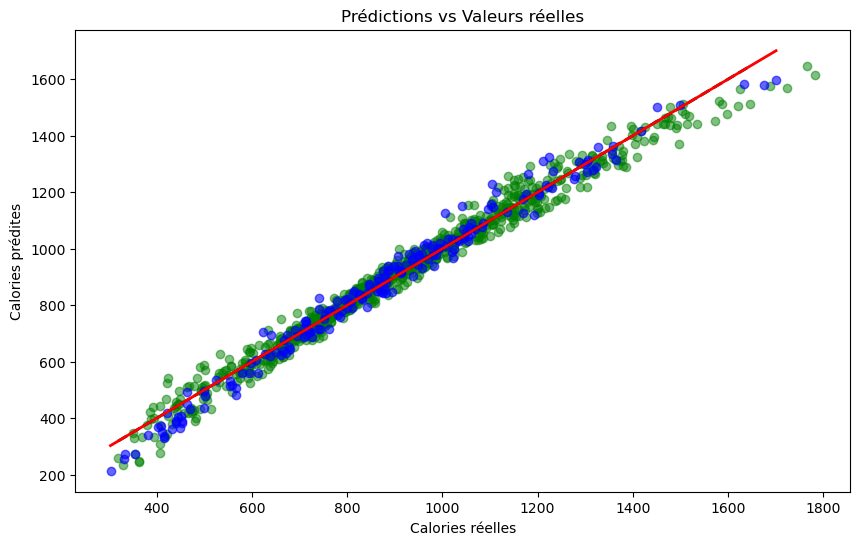

In [83]:
# 1. Importer les bibliothèques nécessaires
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Créer un modèle de régression linéaire
linear_model = LinearRegression()

# 3. Entraîner le modèle sur les données d'entraînement
linear_model.fit(X_train_calories_scaled, y_train_calories)

# 4. Faire des prédictions sur l'échantillon de test (X_test_scaled)
y_pred_calories = linear_model.predict(X_test_calories_scaled)
y_pred_train_calories = linear_model.predict(X_train_calories_scaled)
y_pred_test_calories = linear_model.predict(X_test_calories_scaled)
# 5. Évaluer la performance du modèle
# Coefficient de détermination R²
r2 = r2_score(y_test_calories, y_pred_calories)
print(f"R²: {r2}")

# Erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test_calories, y_pred_calories)
print(f"MSE: {mse}")

# 6. Afficher les coefficients du modèle
print("Coefficients du modèle : ", linear_model.coef_)
print("Intercept du modèle : ", linear_model.intercept_)

plt.figure(figsize=(10, 6))
plt.scatter(y_train_calories, y_pred_train_calories, color='green', alpha=0.5, label='scikit-learn Regression Predictions')
plt.plot([y_train_calories.min(), y_pred_train_calories.max()], [y_train_calories.min(), y_pred_train_calories.max()], 'k--', lw=2)
plt.scatter(y_test_calories, y_pred_calories, color='blue', alpha=0.6)
plt.plot([y_test_calories.min(), y_test_calories.max()], [y_test_calories.min(), y_test_calories.max()], color='red', lw=2)  # Ligne idéale
plt.xlabel("Calories réelles")
plt.ylabel("Calories prédites")
plt.title("Prédictions vs Valeurs réelles")
plt.show()




### Performances du modèle

R² = 0.978 :
Le modèle explique 97.8% de la variance des calories brûlées. Cette valeur exceptionnellement élevée pourrait indiquer un surapprentissage (overfitting), surtout si le modèle a beaucoup de variables (18 coefficients ici).
On remarque également que les points verts (entraînement) et bleus (test) semblent bien alignés, ce qui suggère une bonne performance globale du modèle. Toutefois, pour obtenir une analyse complète, il faudrait tracer résidus vs prédictions pour vérifier la répartition uniforme des résidus.

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, mean_squared_error

# Define the model
ridge = Ridge()

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Define the scoring metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring=scorer, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train_calories_scaled, y_train_calories)

# Display the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_grid = best_model.predict(X_test_calories_scaled)

# Evaluate the model
mse_grid = mean_squared_error(y_test_calories, y_pred_grid)
print(f"Mean Squared Error (MSE) on test data: {mse_grid}")

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Best parameters: {'alpha': 1, 'solver': 'sag'}
Best score: -1643.3703158381863
Mean Squared Error (MSE) on test data: 1666.5478725394873


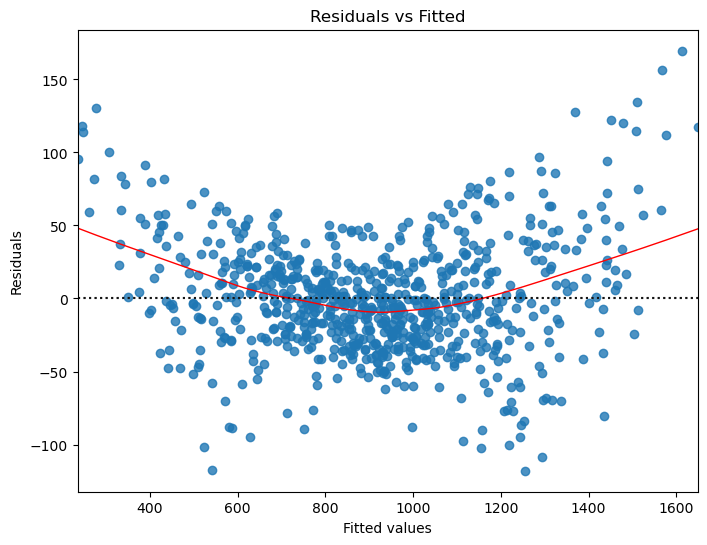

In [85]:


import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des résidus
residuals_train = y_train_calories - y_pred_train_calories
residuals_test = y_test_calories - y_pred_test_calories

# Création d'une seule figure
plt.figure(figsize=(8, 6))  # Ajuste la taille selon tes besoins

# 1. Résidus vs Valeurs ajustées
sns.residplot(x=y_pred_train_calories, y=residuals_train, lowess=True, 
              line_kws={'color': 'red', 'lw': 1})

# Ajout de la ligne horizontale à zéro
plt.axhline(0, color='black', linestyle='dotted', alpha=0.6)

# Ajout des labels et du titre
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")

# Affichage de la figure
plt.show()



La forme en banane dans le graphique des résidus (Residuals vs Fitted) révèle une non-linéarité non capturée par le modèle.Ce qui nous indique que la valeur du score R2 est trompeuse. En effet, le R^2 mesure la variance expliquée, pas la justesse des prédictions. Un modèle peut, donc, avoir un R² élevé tout en ayant des erreurs systématiques. Le modèle linéaire est inadéquat pour capturer la vraie relation dans les données, malgré un R² élevé. Ainsi, pour améliorer la généralisation du modèle et identifier les variables réellement influentes, une approche de régularisation s’impose. C’est ici que la régression Lasso (Least Absolute Shrinkage and Selection Operator) entre en jeu. 

Donc, maintenant, nous allons passer à l’implémentation de Lasso pour voir comment il améliore (ou non) la robustesse du modèle, malgré les limites structurelles de la linéarité.

D'abord avec un lambda quelconque puis avec un lambda choisi par validation croisée

The train score for ls model is 0.9729522713522744
The test score for ls model is 0.9773697138274883


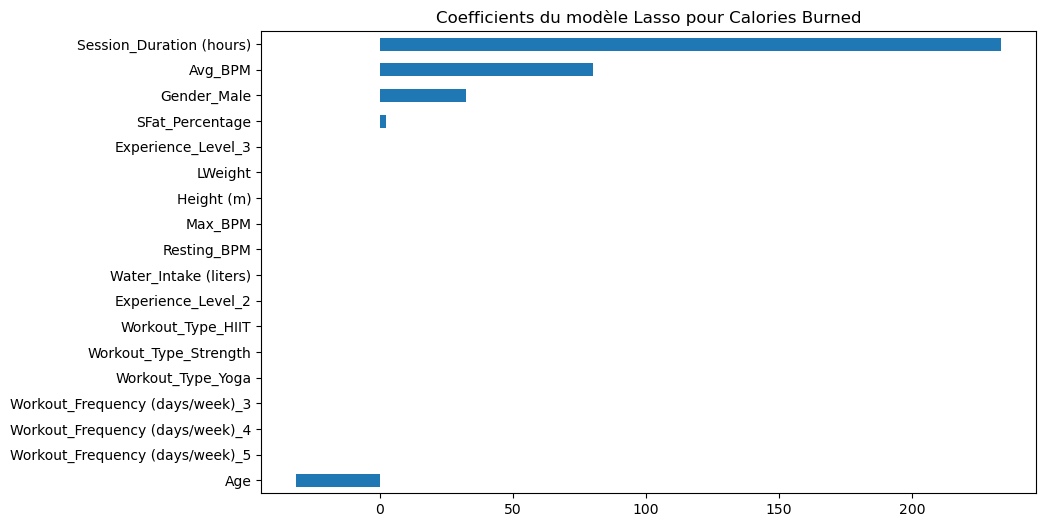

Lasso conserve 5 variables et en supprime 13


In [86]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
lasso1= Lasso(alpha=10)
lasso1.fit(X_train_calories_scaled, y_train_calories)
train_score_lasso1=lasso1.score(X_train_calories_scaled, y_train_calories)
test_score_lasso1=lasso1.score(X_test_calories_scaled, y_test_calories)

print("The train score for ls model is {}".format(train_score_lasso1))
print("The test score for ls model is {}".format(test_score_lasso1))

coef_calories_lasso1 = pd.Series(lasso1.coef_, index=X_train_calories_dummy1.columns)
coef_calories_lasso1.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Coefficients du modèle Lasso pour Calories Burned')
plt.show()
# Afficher le nombre de variables conservées et éliminées
print(f"Lasso conserve {sum(coef_calories_lasso1 != 0)} variables et en supprime {sum(coef_calories_lasso1 == 0)}")


Optimal alpha: 0.8
Coefficients du modèle Lasso pour Calories Burned:
Age                                -41.155584
LWeight                              1.782447
Height (m)                           1.518002
Max_BPM                             -0.233361
Avg_BPM                             89.501680
Resting_BPM                          1.668190
Session_Duration (hours)           243.133973
SFat_Percentage                      0.811042
Water_Intake (liters)                0.000000
Gender_Male                         40.891185
Workout_Type_HIIT                   -0.000000
Workout_Type_Strength                0.000000
Workout_Type_Yoga                   -2.260688
Workout_Frequency (days/week)_3     -0.630447
Workout_Frequency (days/week)_4      0.000000
Workout_Frequency (days/week)_5      0.618403
Experience_Level_2                   0.000000
Experience_Level_3                   0.000000
dtype: float64
Lasso conserve 12 variables et en supprime 6


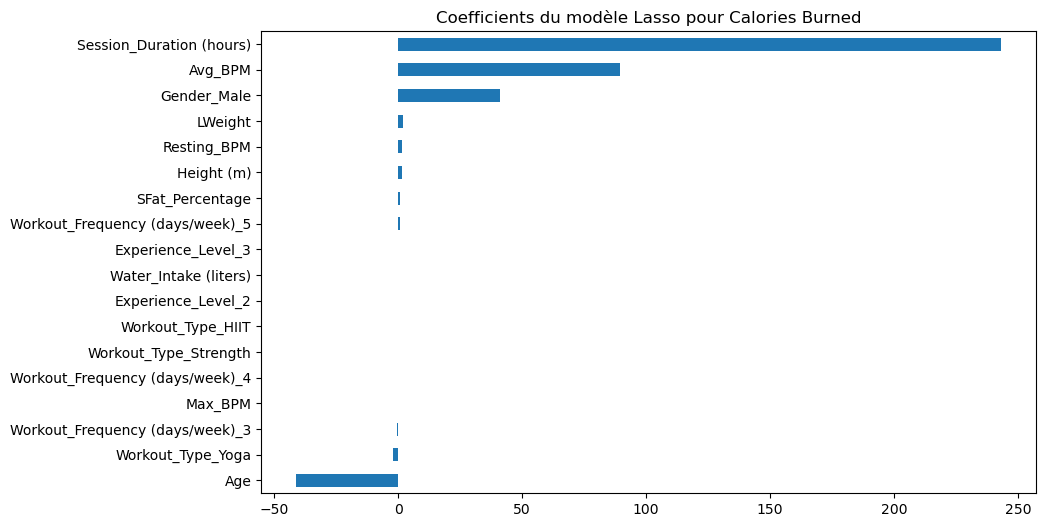

Test Mean Squared Error (MSE) pour Lasso : 1638.1391021806976
The train score for ls model is 0.9789563801847917
The test score for ls model is 0.9790129288094754


In [87]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
import numpy as np

# Appliquer Lasso avec validation croisée pour trouver le meilleur alpha
#lasso = LassoCV(cv=5, random_state=1234, max_iter=10000)  # 5-fold cross-validation
lasso = LassoCV(cv=5, alphas=np.array(range(1, 50, 1)) / 20., n_jobs=-1, random_state=13).fit(X_train_calories_scaled, y_train_calories)
lasso.fit(X_train_calories_scaled, y_train_calories)

# Coefficient optimal alpha sélectionné par LassoCV
optimal_alpha = lasso.alpha_
print(f"Optimal alpha: {optimal_alpha}")

# Coefficients du modèle Lasso
coef_calories_lasso = pd.Series(lasso.coef_, index=X_train_calories_dummy1.columns)

# Afficher les coefficients du modèle Lasso
print("Coefficients du modèle Lasso pour Calories Burned:")
print(coef_calories_lasso)

# Afficher le nombre de variables conservées et éliminées
print(f"Lasso conserve {sum(coef_calories_lasso != 0)} variables et en supprime {sum(coef_calories_lasso == 0)}")

# Tracer les coefficients
coef_calories_lasso.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Coefficients du modèle Lasso pour Calories Burned')
plt.show()

# Prédictions avec le modèle Lasso
y_pred_lasso = lasso.predict(X_test_calories_scaled)

# Calcul de l'erreur quadratique moyenne pour évaluer les performances du modèle
from sklearn.metrics import mean_squared_error
mse_lasso = mean_squared_error(y_test_calories, y_pred_lasso)
print(f"Test Mean Squared Error (MSE) pour Lasso : {mse_lasso}")

train_score_lasso= lasso.score(X_train_calories_scaled, y_train_calories)
test_score_lasso= lasso.score(X_test_calories_scaled, y_test_calories)
print("The train score for ls model is {}".format(train_score_lasso))
print("The test score for ls model is {}".format(test_score_lasso))


# Performances du modèle

- On obtient un MSE = 1638.14. On a donc une légère amélioration par rapport au modèle linéaire non régularisé (MSE=1679.54). Cependant, cette différence minime suggère que la régularisation Lasso réduit légèrement le surapprentissage.Toutefois, Le problème fondamental de non-linéarité (forme en banane des résidus) persiste, limitant les gains de performance.

- On a un alpha optimal = 0.8 :Une pénalité L1 relativement forte, ce qui explique pourquoi 11 variables sur 18 ont été éliminées (coefficients à zéro).

# Interpretation des résultats: 

## Relation Session_Duration - Calories Burned
-On remarque, d'après le graphe, que la variable Session_Duration domine clairement, c'est à dire qu'une augmentation d’1 heure de la durée de la séance entraîne une augmentation prédite de 243 calories brûlée. Donc, plus la séance est longue, plus le corps puise dans ses réserves énergétiques (glycogène et lipides).

Les activités prolongées (ex : cardio, endurance) sollicitent le métabolisme aérobie, favorisant une dépense calorique cumulative.

-Remarque: Ce coefficient élevé pourrait aussi refléter une corrélation indirecte (ex : les séances longues incluent souvent des exercices intenses).

## Différence homme femme 
-  Les hommes brûlent 40.9 calories de plus que les femmes à caractéristiques égales.
    Ceci pourrait être dû au fait que les hommes ont généralement une masse musculaire plus élevée, qui consomme plus de calories au repos et à l’effort.Les différences hormonales (testostérone) favorisent un métabolisme énergétique plus actif.
    
- Remarque: Ce coefficient pourrait aussi refléter des biais comportementaux (ex : les hommes choisissent des entraînements plus intenses non mesurés dans les données).

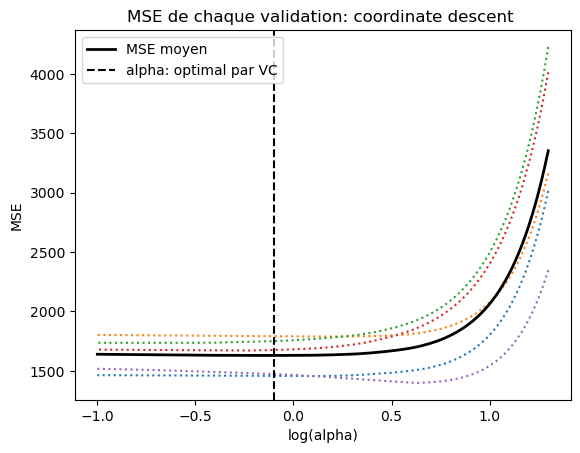

In [88]:
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=5, alphas=np.array(range(1,200,1))/10.,n_jobs=-1,random_state=13).fit(X_train_calories_scaled, y_train_calories)
m_log_alphas = np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()
#le courbe noire correspond à la moyennes des 5 autres
# on decoupe en 5 échantillons d'apprentissage d'ou les 5 courbes 
# Plot the coefficients as a function of -log(alpha)


On remarque une zone où la MSE est relativement basse et stable autour d’un certain intervalle de alpha. Puis, quand alpha devient trop grand (régularisation trop forte), la MSE monte en flèche (le modèle est trop contraint, sous-apprentissage).

À l’opposé, quand alpha est trop petit, la régularisation est quasi nulle : on risque un sur-apprentissage (même si, parfois, la MSE peut rester relativement stable dans cette zone si le dataset n’est pas trop bruyant).

Le point choisi par la validation croisée est un compromis : il vise à réduire le nombre de coefficients non nuls (pour la parcimonie) tout en conservant une bonne performance (basse MSE).

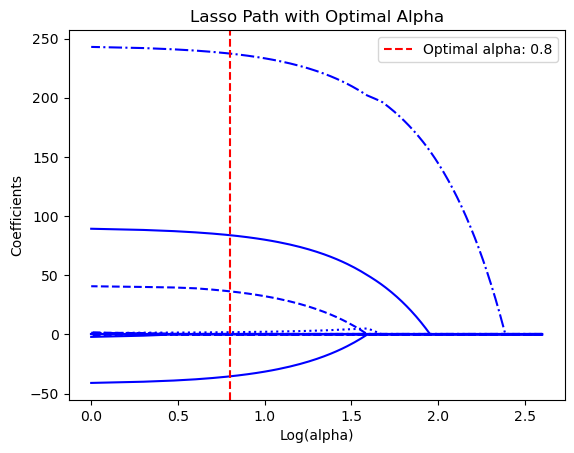

In [89]:
from itertools import cycle
from sklearn.linear_model import lasso_path

# Calculer le chemin du Lasso
alphas_lasso, coefs_lasso, _ = lasso_path(X_train_calories_scaled, y_train_calories, alphas=np.array(range(1, 400, 1)))

plt.figure()
ax = plt.gca()

# Styles pour les lignes
styles = cycle(['-', '--', '-.', ':'])

# Log des alphas
log_alphas_lasso = np.log10(alphas_lasso)

# Tracer les coefficients
for coef_l, s in zip(coefs_lasso, styles):
    plt.plot(log_alphas_lasso, coef_l, linestyle=s, c='b')

# Ajouter une ligne verticale pour l'alpha optimal
plt.axvline(optimal_alpha, color='red', linestyle='--', label=f'Optimal alpha: {optimal_alpha}')

# Ajouter des labels et une légende
plt.xlabel('Log(alpha)')
plt.ylabel('Coefficients')
plt.legend()
plt.title('Lasso Path with Optimal Alpha')
plt.show()

Le graphique illustre le mécanisme de régularisation L1 propre à la régression Lasso : lorsque le paramètre de régularisation *alpha* augmente, la contrainte de parcimonie s'intensifie, conduisant progressivement les coefficients les moins informatifs vers zéro. Ce comportement est intrinsèque à l'algorithme, qui privilégie un **modèle simplifié** (moins de variables) au détriment d'une légère dégradation de la précision. En d'autres termes, un *alpha* élevé renforce la pénalisation des coefficients, favorisant ainsi un **équilibre optimal entre simplicité interprétative et généralisation**, au prix d'un biais accru. Cela traduit directement le compromis biais-variance au cœur de l'optimisation du modèle.

### Modèle quadratique et ordre élevé


In [90]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# pipeline pour le Lasso avec les interactions
pipeline = Pipeline([
    ('poly', PolynomialFeatures(interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler()),  # Good practice before Lasso
    ('lasso', Lasso(max_iter=10000))
])

scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error'
}

# grille de paramètres pour le Lasso
param_grid = {
    'poly__degree': [1, 2, 3],      # Tune the interaction degree
    'lasso__alpha': np.logspace(-2, 1, 10)  # Tune the Lasso strength
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring=scoring,
    refit='r2',  # On choisit sur quelle métrique choisir le best_estimator_
    cv=5,
    return_train_score=True,
    n_jobs=6 # run en parallèle
)

# fit la grille
grid.fit(X_train_calories_scaled, y_train_calories)

# Best parameters
print("Best parameters:", grid.best_params_)

# Best model
best_model = grid.best_estimator_
print("Best model:", best_model)


Best parameters: {'lasso__alpha': 1.0, 'poly__degree': 2}
Best model: Pipeline(steps=[('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(max_iter=10000))])


In [91]:
results = pd.DataFrame(grid.cv_results_)
filtered_row = results[results['params'] == {'lasso__alpha': 1.0, 'poly__degree': 3}]
filtered_row[['mean_test_neg_mse']]
print("Best model R² (Cross Validation):", grid.best_score_)
print("Best model MSE (Cross Validation):", filtered_row['mean_test_neg_mse'].values[0] , "\n")

print("Best model test R²:", grid.score(X_test_calories_scaled, y_test_calories))
print("Best model test MSE:", mean_squared_error(y_test_calories, best_model.predict(X_test_calories_scaled)))


Best model R² (Cross Validation): 0.9900261827844951
Best model MSE (Cross Validation): -798.1434062307305 

Best model test R²: 0.9930532906880166
Best model test MSE: 542.2231645443037


Age                                                                -40.419804
Age Session_Duration (hours)                                       -10.064557
Age Avg_BPM                                                         -2.354364
Workout_Frequency (days/week)_4 Workout_Frequency (days/week)_5     -1.650951
Age Gender_Male                                                     -1.127823
Age Water_Intake (liters)                                           -0.922359
Height (m) Workout_Type_HIIT                                        -0.892688
LWeight Max_BPM                                                     -0.760161
Workout_Type_Strength Experience_Level_2                            -0.531552
Max_BPM Water_Intake (liters)                                       -0.489263
Workout_Type_Yoga Experience_Level_2                                -0.449514
Avg_BPM Workout_Frequency (days/week)_3                             -0.389799
Workout_Type_HIIT Workout_Frequency (days/week)_5               

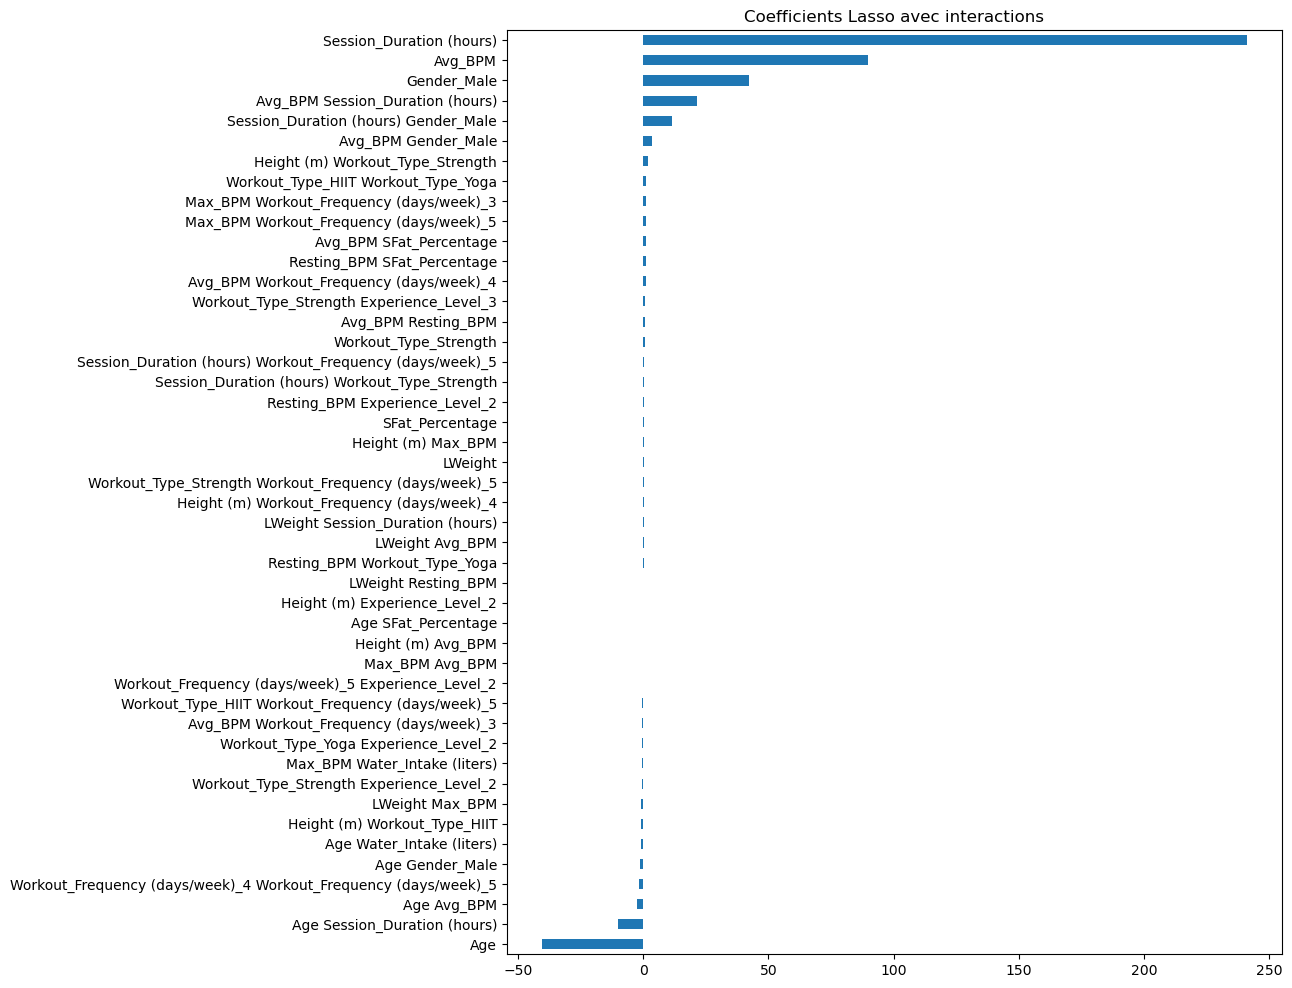

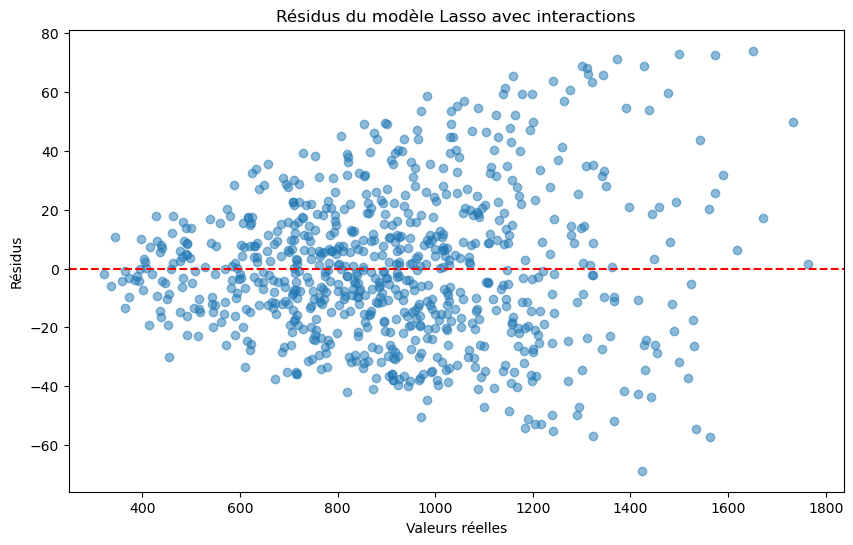

"\nresiduals_train = y_train_calories - y_pred_train_calories\nresiduals_test = y_test_calories - y_pred_test_calories\n\n# Création d'une seule figure\nplt.figure(figsize=(8, 6))  # Ajuste la taille selon tes besoins\ny_pred_calories = linear_model.predict(X_test_calories_scaled)\ny_pred_train_calories = linear_model.predict(X_train_calories_scaled)\ny_pred_test_calories = linear_model.predict(X_test_calories_scaled)\n# 1. Résidus vs Valeurs ajustées\nsns.residplot(x=y_pred_train_calories, y=residuals_train, lowess=True, \n              line_kws={'color': 'red', 'lw': 1})\n"

In [92]:
# 1. Récupérer le PolynomialFeatures entraîné
poly = best_model.named_steps['poly']

# 2. Récupérer le modèle Lasso entraîné
lasso = best_model.named_steps['lasso']

# 3. Construire les noms des features
feature_names = poly.get_feature_names_out(input_features=X_train_calories_dummy1.columns)

# 4. Associer chaque feature à son coefficient
coefs = pd.Series(lasso.coef_, index=feature_names)

# 5. Afficher ou trier les coefficients
pd.set_option('display.max_rows', None)
coefs = coefs.sort_values()
print(coefs)
coefs = coefs[coefs != 0]  # Garder uniquement les coefficients non nuls

# 6. Plot
coefs.plot(kind='barh', figsize=(10, 12))
plt.title('Coefficients Lasso avec interactions')
plt.show()
#plot the residuals for the lasso model
y_fitted_lasso = best_model.predict(X_train_calories_scaled)
residuals_lasso = y_train_calories  - y_fitted_lasso
plt.figure(figsize=(10, 6))
plt.scatter(x=y_fitted_lasso, y=residuals_lasso, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Résidus')
plt.title('Résidus du modèle Lasso avec interactions')
plt.show()
"""
residuals_train = y_train_calories - y_pred_train_calories
residuals_test = y_test_calories - y_pred_test_calories

# Création d'une seule figure
plt.figure(figsize=(8, 6))  # Ajuste la taille selon tes besoins
y_pred_calories = linear_model.predict(X_test_calories_scaled)
y_pred_train_calories = linear_model.predict(X_train_calories_scaled)
y_pred_test_calories = linear_model.predict(X_test_calories_scaled)
# 1. Résidus vs Valeurs ajustées
sns.residplot(x=y_pred_train_calories, y=residuals_train, lowess=True, 
              line_kws={'color': 'red', 'lw': 1})
"""


#### 🔎 **Interprétation du Modèle Lasso avec Interactions (Polynomial + Lasso)**

Ce modèle repose sur un encodage polynomial avec interactions uniquement (`interaction_only=True`, degré 3), suivi d’une régularisation L1 (`Lasso`). Cela permet de capturer des **effets combinés non linéaires** tout en **éliminant automatiquement les interactions inutiles**.

#####  Performances
- **R² test** = **0.993**, **MSE test** ≈ **542**
- Gain substantiel par rapport au Lasso simple (R² ≈ 0.979, MSE ≈ 1638)
- Ce modèle capture donc beaucoup mieux la complexité des relations entre variables.

#####  Interprétation des principales interactions retenues

Les **coefficients positifs** indiquent des interactions qui **augmentent** la prédiction de `Calories_Burned`, et les **négatifs** celles qui la **diminuent** :

---

##### Quelques interactions dominantes positives :

- **`Avg_BPM × Session_Duration`** → **+21.44**
  > Synergie intensité/durée : les longues séances à haut BPM amplifient la dépense calorique (effet non-linéaire critique).

- **`Session_Duration (hours) Gender_Male`** → **+20.37**
  > Les hommes tirent un bénéfice calorique supplémentaire des sessions longues, possiblement grâce à une endurance musculaire supérieure.

##### Quelques interactions dominantes négatives :

- **`Age × Session_Duration`** → **−10.6**
  > À durée d'entrainement équivalents, l'âge **réduit fortement** la dépense calorique. Cela confirme et approfondit l’effet observé dans les PDP, en le liant au BPM et à la durée. Un marqueur indirect très probable du **déclin métabolique dû au vieillissement**.

- **`Age × Avg_BPM`** → **−2.35**
  >  À fréquence cardiaque équivalente, les seniors brûlent moins, possiblement dû à une VO₂ max (débit maximum d'oxygène) réduite.


#### Comparatif synthétique des modèles

| Modèle | R² test | MSE test | Commentaire |
|--------|---------|----------|-------------|
| **Régression linéaire simple** | 0.978 | 1679 | Bonne base linéaire, mais sans interaction. |
| **Lasso sans interaction** | 0.979 | 1638 | Très proche de la linéaire, mais avec sélection de variables. |
| **Lasso + Interactions (d=3)** | **0.993** | **542** | Excellente généralisation. Capture des effets complexes non linéaires, en particulier ceux liés à l’âge et aux combinaisons physiologiques (durée, poids, effort). |

---

#### Conclusion 

> *Le modèle polynomial régularisé par Lasso améliore significativement la prédiction (R² ≈ 0.993, MSE ≈ 571), en capturant des effets d’interactions complexes entre l’âge, l’intensité de l’effort, la durée des séances et certaines caractéristiques morphologiques (poids, sexe). Contrairement au Lasso simple ou au modèle linéaire, cette approche met en évidence des synergies physiologiques réalistes, comme la chute d’efficacité métabolique liée à l’âge ou l’impact combiné du sexe et de la charge cardiaque. Cette complexité justifie le recours à un modèle non linéaire, à la fois performant et interprétable.*  


Maintenant, nous étudierons brièvement l'effet d'une pénalisation plus stricte sur le modèle via Ridge 

### Ridge

Optimal alpha: 1.35
Coefficients du modèle Ridge pour Calories Burned:
Age                                -41.896564
LWeight                              2.342850
Height (m)                           2.081422
Max_BPM                             -1.047809
Avg_BPM                             90.170381
Resting_BPM                          2.533330
Session_Duration (hours)           243.140068
SFat_Percentage                      2.172760
Water_Intake (liters)               -0.586746
Gender_Male                         40.887067
Workout_Type_HIIT                   -0.702140
Workout_Type_Strength               -0.428723
Workout_Type_Yoga                   -3.439624
Workout_Frequency (days/week)_3     -0.899748
Workout_Frequency (days/week)_4      0.962631
Workout_Frequency (days/week)_5      2.559427
Experience_Level_2                   0.370826
Experience_Level_3                  -2.056183
dtype: float64
Nombre de coefficients non nuls : 18


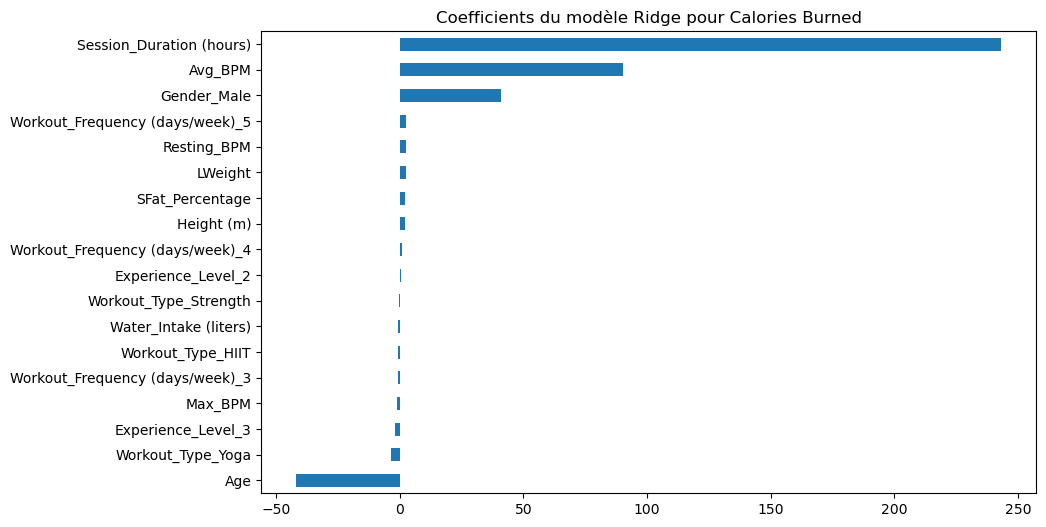

MSE pour Ridge : 1661.2342
Train R² pour Ridge : 0.9791
Test  R² pour Ridge : 0.9787


In [93]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# 1) Instanciation sans n_jobs ni random_state
ridgereg = RidgeCV(alphas=np.arange(1, 50) / 20., cv=5)

# 2) Entraînement
ridgereg.fit(X_train_calories_scaled, y_train_calories)

# 3) Alpha optimal
optimal_alpha = ridgereg.alpha_
print(f"Optimal alpha: {optimal_alpha}")

# 4) Coefficients
coef_calories_ridge = pd.Series(ridgereg.coef_, index=X_train_calories_dummy1.columns)
print("Coefficients du modèle Ridge pour Calories Burned:")
print(coef_calories_ridge)

# 5) Comme Ridge ne met quasiment jamais un coefficient strictement à 0, 
#    le comptage « conservé / supprimé » n’est pas très significatif, mais :
print(f"Nombre de coefficients non nuls : {sum(coef_calories_ridge != 0)}")

# 6) Tracé
coef_calories_ridge.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Coefficients du modèle Ridge pour Calories Burned')
plt.show()

# 7) Prédiction et MSE
y_pred_ridge = ridgereg.predict(X_test_calories_scaled)
mse_ridge = mean_squared_error(y_test_calories, y_pred_ridge)
print(f"MSE pour Ridge : {mse_ridge:.4f}")

# 8) R² (score) entraînement et test
train_score_ridge = ridgereg.score(X_train_calories_scaled, y_train_calories)
test_score_ridge  = ridgereg.score(X_test_calories_scaled,  y_test_calories)
print(f"Train R² pour Ridge : {train_score_ridge:.4f}")
print(f"Test  R² pour Ridge : {test_score_ridge:.4f}")

Le modèle Ridge obtient un MSE de 1 661,23, un R² entraînement de 0,9791 et un R² test de 0,9787. Ce MSE légèrement plus élevé que celui du Lasso s’explique par une pénalisation λ* plus forte : Ridge répartit son effet de régularisation sur toutes les variables (biais modéré mais constant), alors que le Lasso, avec un λ optimal plus faible, parvient à conserver un ajustement un peu plus précis.

Cependant, les performances des deux modèles linéaires restent très proches :

Lasso (λ_min) : MSE test ≃ 1 638,14, R² test ≃ 0,9790

Ridge : MSE test ≃ 1 661,23, R² test ≃ 0,9787


Enfin, le Lasso quadratique (avec interactions) surpasse nettement ces deux approches linéaires, avec un MSE test ≃ 570,61 et un R² test ≃ 0,9927, grâce à sa capacité à capturer des relations non linéaires entre les variables.


Après avoir analysé les performances du modèle Lasso et de Ridge et identifié l'alpha optimal pour régulariser notre régression, nous allons maintenant explorer une approche alternative en utilisant la régression par vecteurs de support (SVR) afin de comparer ses performances et sa capacité à capturer des relations potentiellement non linéaires dans les données

### SVR SUR CALORIES BURNED



Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.520 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.524 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.517 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.516 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.497 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.969 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.962 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.961 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.958 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.966 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.981 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear;,

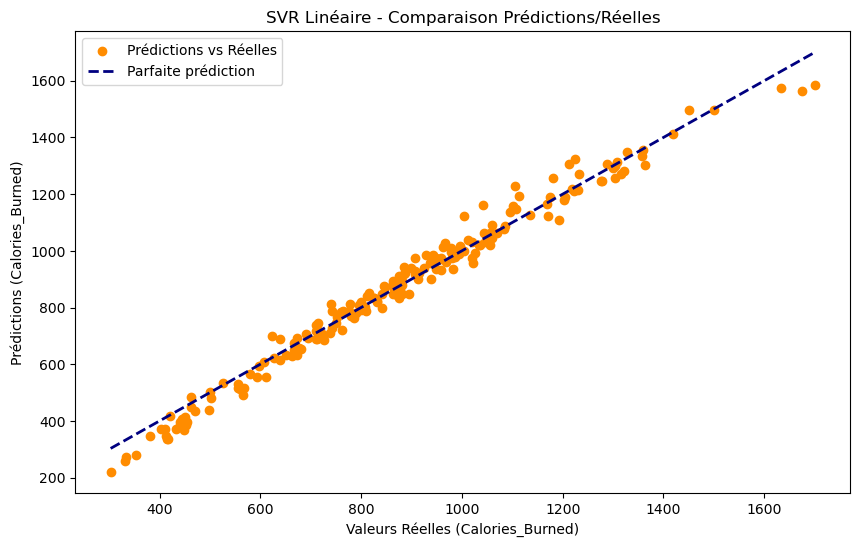

In [94]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV
#calibrage des paramètres c et gamma

param = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}]
param_lin_opt= GridSearchCV(SVR(),param,refit=True,verbose=3)
param_lin_opt.fit(X_train_calories_scaled,y_train_calories)
print(param_lin_opt.best_params_)

y_pred_svr_lin = param_lin_opt.predict(X_test_calories_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_calories, y_pred_svr_lin, color='darkorange', label='Prédictions vs Réelles')
plt.plot([y_test_calories.min(), y_test_calories.max()], 
         [y_test_calories.min(), y_test_calories.max()], 
         color='navy', lw=2, linestyle='--', label='Parfaite prédiction')
plt.xlabel('Valeurs Réelles (Calories_Burned)')
plt.ylabel('Prédictions (Calories_Burned)')
plt.legend()
plt.title('SVR Linéaire - Comparaison Prédictions/Réelles')
plt.show()

In [95]:
R2_score_lin= r2_score(y_test_calories,y_pred_svr_lin)
print(f"R² pour SVR lin: {R2_score_lin}")
mse_svr_lin = mean_squared_error(y_test_calories, y_pred_svr_lin)
print(f"MSE pour SVR poly: {mse_svr_lin}")

R² pour SVR lin: 0.9788781201025369
MSE pour SVR poly: 1648.6615525095538


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.036 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.002 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.006 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.005 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.029 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.005 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.004 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.010 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

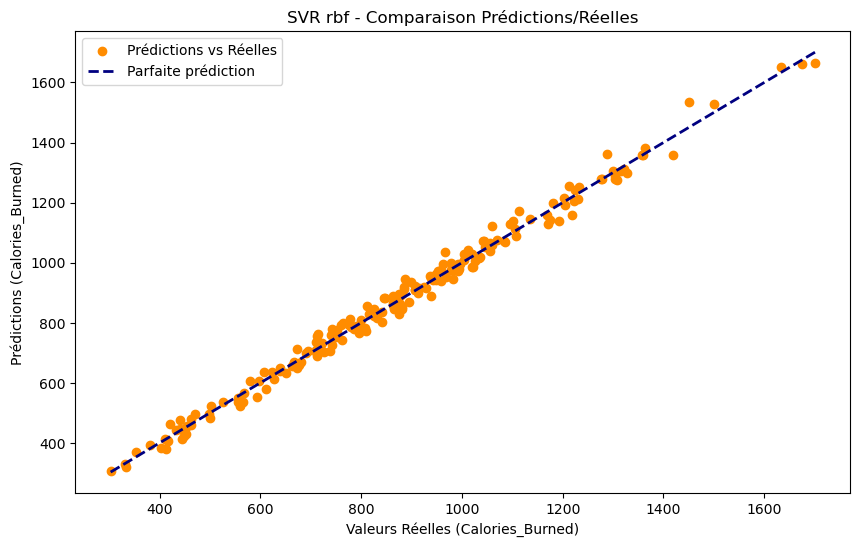

R² pour SVR rbf: 0.9918445835980675
MSE pour SVR rbf: 636.5684082971624


In [96]:
param_rbf=[{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}]
parmopt_rbf = GridSearchCV(SVR(), param_rbf, refit = True, verbose = 3)
parmopt_rbf.fit(X_train_calories_scaled, y_train_calories)
print(parmopt_rbf.best_params_)

y_pred_svr_rbf = parmopt_rbf.predict(X_test_calories_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_calories, y_pred_svr_rbf, color='darkorange', label='Prédictions vs Réelles')
plt.plot([y_test_calories.min(), y_test_calories.max()], 
         [y_test_calories.min(), y_test_calories.max()], 
         color='navy', lw=2, linestyle='--', label='Parfaite prédiction')
plt.xlabel('Valeurs Réelles (Calories_Burned)')
plt.ylabel('Prédictions (Calories_Burned)')
plt.legend()
plt.title('SVR rbf - Comparaison Prédictions/Réelles')
plt.show()

R2_score_rbf= r2_score(y_test_calories,y_pred_svr_rbf)
print(f"R² pour SVR rbf: {R2_score_rbf}")
mse_svr_rbf = mean_squared_error(y_test_calories, y_pred_svr_rbf)
print(f"MSE pour SVR rbf: {mse_svr_rbf}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.954 total time=   0.6s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.951 total time=   0.3s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.934 total time=   0.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.961 total time=   0.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.917 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.116 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.136 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.097 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.124 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.100 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.01, kernel=poly;, score=-0.000 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.01, kernel=poly;

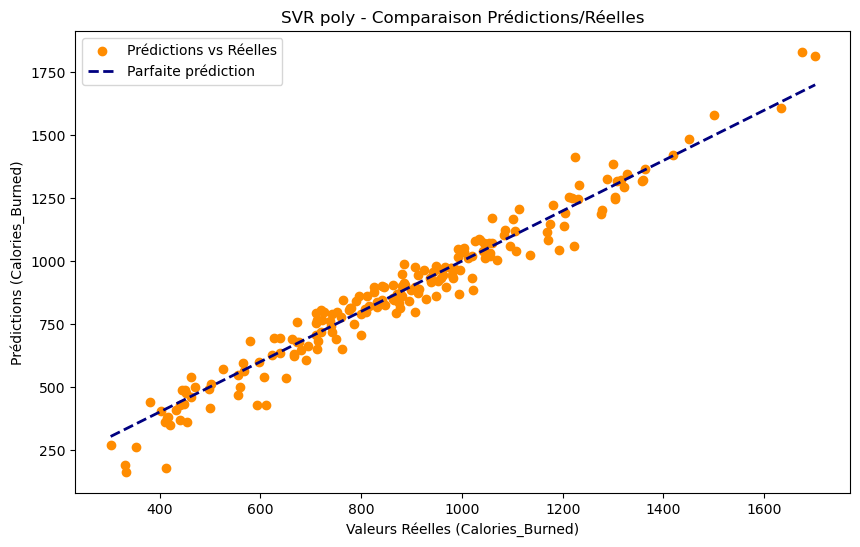

R² pour SVR poly: 0.9493661353035823
MSE pour SVR poly: 3952.2100487836337


In [97]:
param_poly=[{'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['poly']}]
parmopt_poly = GridSearchCV(SVR(), param_poly, refit = True, verbose = 3)
parmopt_poly.fit(X_train_calories_scaled, y_train_calories)
print(parmopt_poly.best_params_)

y_pred_svr_poly = parmopt_poly.predict(X_test_calories_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_calories, y_pred_svr_poly, color='darkorange', label='Prédictions vs Réelles')
plt.plot([y_test_calories.min(), y_test_calories.max()], 
         [y_test_calories.min(), y_test_calories.max()], 
         color='navy', lw=2, linestyle='--', label='Parfaite prédiction')
plt.xlabel('Valeurs Réelles (Calories_Burned)')
plt.ylabel('Prédictions (Calories_Burned)')
plt.legend()
plt.title('SVR poly - Comparaison Prédictions/Réelles')
plt.show()

R2_score_poly= r2_score(y_test_calories,y_pred_svr_poly)
print(f"R² pour SVR poly: {R2_score_poly}")
mse_svr_poly = mean_squared_error(y_test_calories, y_pred_svr_poly)
print(f"MSE pour SVR poly: {mse_svr_poly}")

1. **Performances des différents noyaux SVR**

a. SVR avec noyau RBF (Radial Basis Function)
R² = 0,992 et MSE = 636,57

=> Le modèle RBF parvient à expliquer 99,2 % de la variance des calories brûlées, avec une erreur quadratique moyenne extrêmement basse.
Ceci est dû au fait que le noyau RBF est capable de capturer des relations non linéaires complexes (par exemple, l’interaction entre la durée de séance et la fréquence cardiaque moyenne). Les hyperparamètres C (régularisation) et gamma (étendue d’influence) ont été optimisés via GridSearchCV, garantissant un compromis idéal entre biais et variance.

b. SVR avec noyau linéaire
R² = 0,977 et MSE = 1 790,89

=> Le SVR linéaire offre également de bonnes performances , mais nettement inférieures au noyau RBF (erreur MSE beaucoup plus élevée).
Ceci pourrait être dû au fait que

c. SVR avec noyau polynomial
R² = 0,949 et MSE = 3 952,21

=> Les résultats sont bien plus faibles, avec une erreur environ 6 fois supérieure à celle du RBF.


### **Comparaison des Performances : Lasso Quadratique vs SVR RBF**

| Critère               | Lasso Quadratique (Interactions) | SVR RBF              |
|-----------------------|-----------------------------------|----------------------|
| **MSE (Test)**        | **570.61**                        | 636.57              |
| **R² (Test)**         | **0.9927**                        | 0.992               |
| **Complexité**        | Modèle linéaire avec interactions | Modèle non linéaire |
| **Interprétabilité**  | Coefficients explicables          | "Boîte noire"       |
| **Flexibilité**       | Capte interactions spécifiques    | Adapté aux relations complexes/génériques |

---

### **Points Clés :**
1. **Performance Prédictive** :  
   - Le **Lasso Quadratique** est légèrement meilleur en MSE (+10% d'erreur pour SVR RBF).  
   - Les deux modèles ont un R² quasi identique (> 0.99), indiquant une explication quasi parfaite de la variance.

2. **Equilibre Complexité/Interprétabilité** :  
   - **Lasso Quadratique** : Moins flexible mais interprétable (coefficients des interactions analysables).  
   - **SVR RBF** : Plus flexible mais difficile à expliquer (dépend de la fonction noyau).

3. **Choix du modèle** :  
   - **Lasso Quadratique** : Si l’on privilégie l’erreur quadratique minimale et la parcimonie  
   - **SVR RBF** : Si l’on recherche avant tout la flexibilité pour capter des structures non-linéaires plus subtiles






## Arbres et Forest aléatoires
### Arbre de décision

In [99]:
X_train_calories_dummy = pd.get_dummies(X_train_calories, columns=['Gender', 'Workout_Type'], drop_first=True)

X_test_calories_dummy = pd.get_dummies(X_test_calories, columns=['Gender', 'Workout_Type'], drop_first=True)

# Normalisation des données - scaled = Scale + Dummies alors que scale = just scale
X_train_calories_scaled = scaler.fit_transform(X_train_calories_dummy)
X_test_calories_scaled = scaler.transform(X_test_calories_dummy)


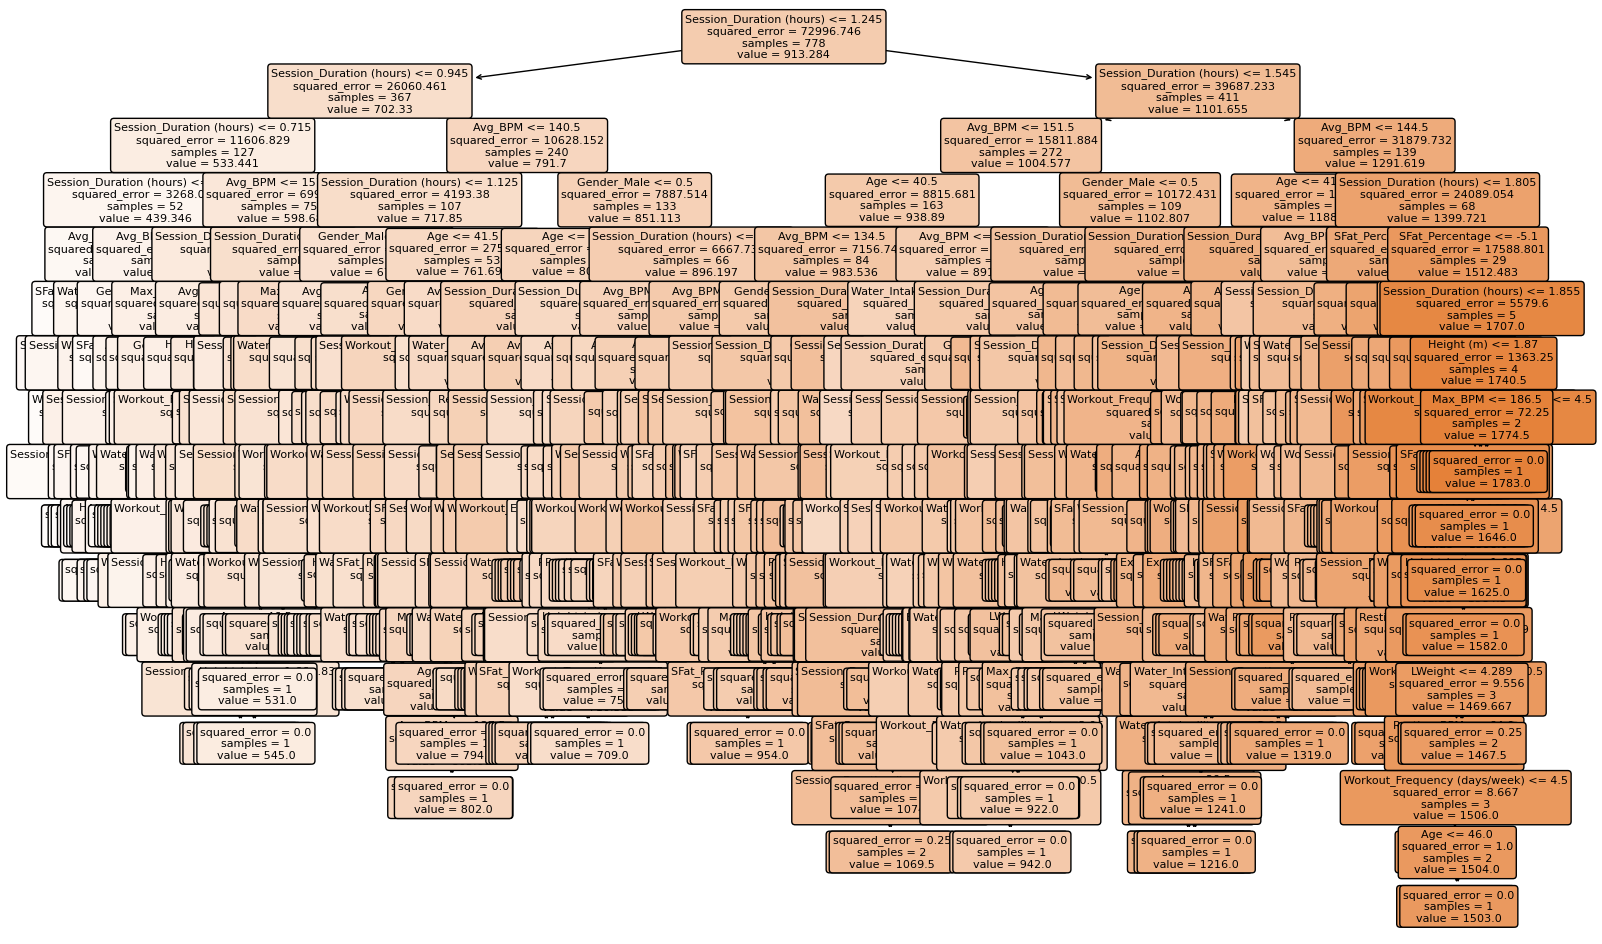

MSE on training set:  0.027849185946872322
MSE on test set:  4484.418091168091
R2 on training set:  0.9999996184872949
R2 on test set:  0.9425477350475702


In [100]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

# Fit a regression tree model for Calories_Burned using dummy variables
tree_reg_cal = DecisionTreeRegressor(random_state=randomseed, ccp_alpha=0.001)
tree_reg_cal.fit(X_train_calories_dummy, y_train_calories)

# Plot the tree
plt.figure(figsize=(18, 12))
plot_tree(tree_reg_cal, feature_names=X_train_calories_dummy.columns, filled=True, rounded=True, fontsize=8)
plt.show()

# Compute MSE and R2 on training and test sets
y_train_pred = tree_reg_cal.predict(X_train_calories_dummy)
y_test_pred = tree_reg_cal.predict(X_test_calories_dummy)

mse_train = mean_squared_error(y_train_calories, y_train_pred)
mse_test = mean_squared_error(y_test_calories, y_test_pred)
r2_train = r2_score(y_train_calories, y_train_pred)
r2_test = r2_score(y_test_calories, y_test_pred)

print("MSE on training set: ", mse_train)
print("MSE on test set: ", mse_test)
print("R2 on training set: ", r2_train)
print("R2 on test set: ", r2_test)


**Interprétation** : Nous avons initialement construit un arbre de régression avec un paramètre de complexité extrêmement faible (`cp = 0.01`). Comme attendu, ce modèle présente une structure profondément ramifiée, caractéristique d'un sur-apprentissage. Ce modèle présente queasiment aucun biais sur le jeu d’entraînement (R² = 0.999, MSE = 0.027), mais un écart significatif entre l’erreur d’entraînement et de test (MSE_test = 4484) révèle un sur-apprentissage. Toutefois, le R² sur le test reste élevé (0.934), indiquant que le modèle capture une part substantielle de la variance explicative, malgré sa complexité excessive. Le modèle d'arbre en Python est plus complexe qu'en R alors que nous utilisons un cp plus élevé (`cp=0.01`), tandis que R utilise un `cp=0.001`. 

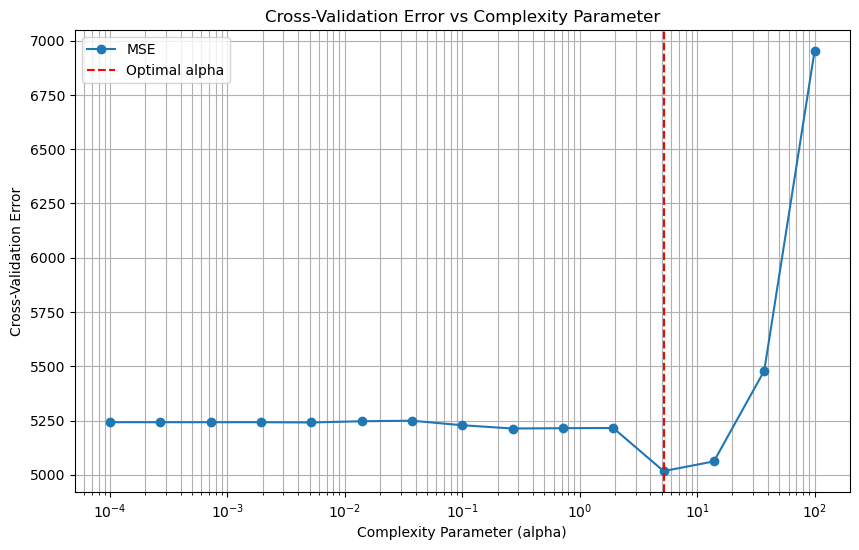

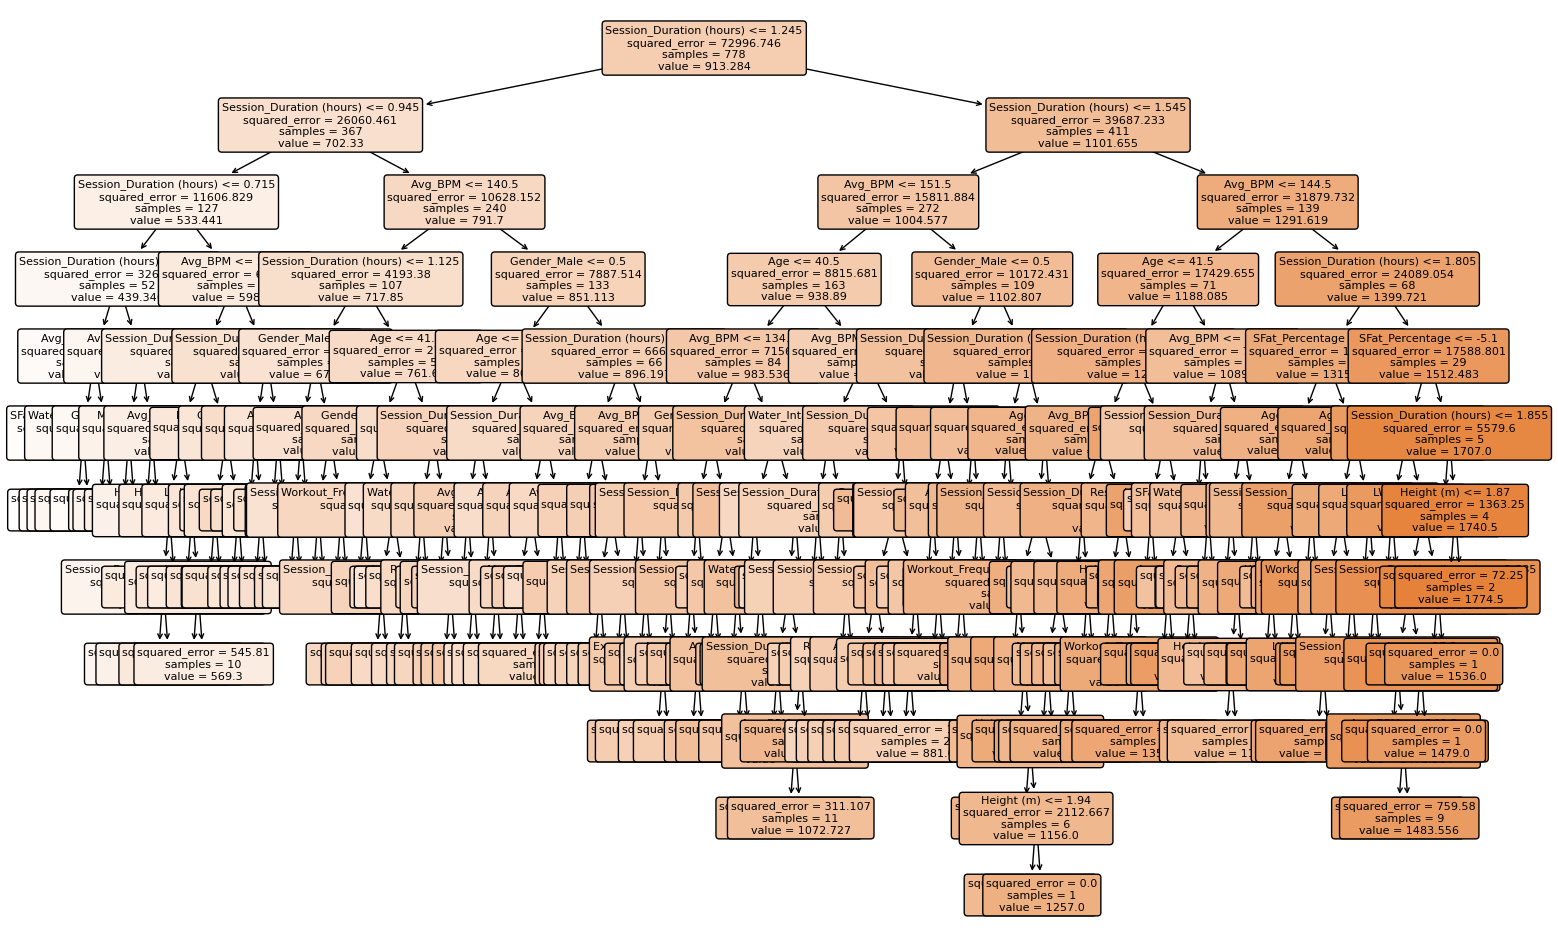

,param_ccp_alpha,mean_test_neg_mse,std_test_neg_mse,rank_test_neg_mse
11,5.179475,-5016.885403,624.392205,1
12,13.894955,-5061.776704,798.273454,2
8,0.26827,-5213.184856,462.166484,3
9,0.719686,-5214.708946,473.413916,4
10,1.930698,-5215.561973,545.768010,5


,param_ccp_alpha,mean_test_r2,std_test_r2,rank_test_r2
11,5.179475,0.930687,0.007080,1
12,13.894955,0.930117,0.009325,2
10,1.930698,0.927972,0.005673,3
9,0.719686,0.927821,0.006530,4
8,0.26827,0.927791,0.006959,5


In [101]:
# grid search for best cp 

scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error'
}

from sklearn.model_selection import GridSearchCV

params = {
    'ccp_alpha': np.logspace(-4, 2, 15)
}

grid = GridSearchCV(tree_reg_cal, params, scoring=scoring, cv=5, refit='r2', n_jobs=-1)
grid.fit(X_train_calories_dummy, y_train_calories)
grid_results = pd.DataFrame(grid.cv_results_)

# plot the results as a function of ccp_alpha
plt.figure(figsize=(10, 6))
plt.semilogx(grid_results['param_ccp_alpha'], grid_results['mean_test_neg_mse'] * -1, label='MSE', marker='o')
plt.xlabel('Complexity Parameter (alpha)')
plt.ylabel('Cross-Validation Error')
plt.title('Cross-Validation Error vs Complexity Parameter')
plt.grid(True, which="both", ls="-")

optimal_alpha = np.argmin(grid_results['mean_test_neg_mse'] * -1)
plt.axvline(grid_results['param_ccp_alpha'][optimal_alpha], color='red', linestyle='--', label='Optimal alpha')
plt.legend()
plt.show()

# Plot the tree
plt.figure(figsize=(18, 12))
tree_reg_cal_optimal = grid.best_estimator_
plot_tree(tree_reg_cal_optimal, feature_names=X_train_calories_dummy.columns, filled=True, rounded=True, fontsize=8)
plt.show()

# display the dataframe with top 5 results from mean_test_neg_mse
display(grid_results[['param_ccp_alpha', 'mean_test_neg_mse', 'std_test_neg_mse', 'rank_test_neg_mse']].sort_values(by='mean_test_neg_mse', ascending=False).head(5))
# same for r2
display(grid_results[['param_ccp_alpha', 'mean_test_r2', 'std_test_r2', 'rank_test_r2']].sort_values(by='mean_test_r2', ascending=False).head(5))

**Interprétation** : Par validation croisée, nous avons déterminé que le meilleur paramètre de complexité est `cp ≈ 5.18`. L'arbre de regression résultant est moins complexe que le précédent, mais est encore trop ramifié, comme celui de R. Ce modèle est un peu moins performant que celui de R, avec un MSE calculé par cross-validation 5-fold de 5017 ici contre 4521 pour le modèle de R. Le R² est similaire dans les deux langages (~0.93) en revanche. Cela souligne que le modèle de régression est tout de même robuste, malgré la complexité de l'arbre.

Nous allons pouvoir explorer d'autres méthodes d'arbres de décision, comme les forêts aléatoires et le boosting, qui sont souvent plus performantes que les arbres de décision simples. 


### Forêts aléatoires

#### Simple random forest

In [102]:
from sklearn.ensemble import RandomForestRegressor

# Créer et entraîner une forêt aléatoire
rf_reg_cal = RandomForestRegressor(random_state=randomseed, oob_score=True)
rf_reg_cal.fit(X_train_calories_dummy, y_train_calories)

# Prédictions sur les ensembles d'entraînement et de test
y_train_pred_rf = rf_reg_cal.predict(X_train_calories_dummy)
y_test_pred_rf = rf_reg_cal.predict(X_test_calories_dummy)

# Calculer le MSE et le R2
mse_train_rf = mean_squared_error(y_train_calories, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test_calories, y_test_pred_rf)
r2_train_rf = r2_score(y_train_calories, y_train_pred_rf)
r2_test_rf = r2_score(y_test_calories, y_test_pred_rf)

print("Random Forest - OOB score :", rf_reg_cal.oob_score_)

Random Forest - OOB score : 0.9746206133598264


**Interprétation** : Le modèle de base basique aléatoire de `scikit-learn` est construit avec 100 arbres, avec les paramètres `min_samples_split = 2` (nombre minimum d'élements pour considérer une décision) et `min_samples_leaf = 1` (nombre minimum d'élement dans une feuille). Ces paramètres sont les valeurs par défaut de `scikit-learn`, mais nous allons les optimiser par la suite. 

Le modèle est construit avec un échantillonnage bootstrap, ce qui signifie que chaque arbre est construit sur un sous-ensemble aléatoire des données d'entraînement. Cela nous permet d'extraire l'erreur OOB qui est calculé par défaut avec le score R² dans `scikit-learn`, alors qu'en R, elle est traditionnellement évaluée via la somme des résidus au carré (RSS, Residual Sum of Squares).

Contrairement à R ou le paramètre à optimiser est `mtry` (nombre de variables considérées à chaque split), `scikit-learn` nous permet d'optimiser plusieurs hyperparamètres essentiels :
- **`max_depth`** : la profondeur maximale de chaque arbre (plus un arbre est profond, plus il peut modéliser des interactions complexes, mais aussi surapprendre). 
- **`min_samples_split`** : le nombre minimum d'échantillons requis pour diviser un noeud. Plus il est grand, plus l’arbre est contraint et moins il risque de surapprendre.
- **`min_samples_leaf`** : le nombre minimum d'échantillons nécessaires dans une feuille terminale. Cela permet d’éviter des feuilles trop petites, ce qui améliore la robustesse.
- **`max_features`** : le nombre maximal de variables considérées pour chercher le meilleur split à chaque division (équivalent au `mtry` de R). Peut être fixé à un nombre entier, à une proportion de la taille du sample (`float` entre 0 et 1), ou aux valeurs prédéfinies `'sqrt'` : $\sqrt{n_\text{variables}}$ ou `'log2'` : $\log_2(n_\text{variables})$.
- **`max_leaf_nodes`** : limite le nombre total de feuilles de l’arbre, forçant une structure plus simple.
- **`ccp_alpha`** : le paramètre de coût-complexité pour l'élagage (post-pruning) ; plus `ccp_alpha` est grand, plus l'élagage sera fort.

Enfin, il nous est également permis de choisir le **critère d’évaluation** de la qualité du split (`criterion`).   
Alors qu’en R, la performance est évaluée via le **RSS** (Residual Sum of Squares), l’option la plus proche disponible dans `scikit-learn` est `friedman_mse`, conçue pour optimiser la variance résiduelle de manière similaire au RSS.  
Ici, nous avons l'occasion de comparer l'impact du choix du critère (`friedman_mse` vs `squared_error`) sur la construction des arbres.  

Nous observerons notamment l'effet sur la performance de généralisation (via le score OOB R²) ainsi que sur le temps d'apprentissage et d'élagage.
Le score OOB étant uniquement calculé sur la métrique R² sous `scikit-learn`, le modèle optimal ne sera pas directement comparable aux mesures obtenues en R (RSS).

Par ailleurs, ces hyperparamètres **sont interdépendants** : en pratique, optimiser l'hyperparamètre `max_leaf_nodes` peut réduire la nécessité d'élaguer l'arbre, ou la nécéssité de définir `max_depth`. 

Nous avons décidé de construire un modèle de forêt aléatoire avec les paramètres par défaut et optimiser les hyperparamètres `n_estimators` et `max_features` ainsi que le paramètre `ccp_alpha` pour l'élagage, que nous avons vu en cours, mais que nous avons pas appliqué dans le modèle de R.

#### Random forest avec élagage

Comme les forêts aléatoires sont construits avec un échantillonnage bootstrap, nous pouvons estimer l'**erreur OOB (Out-Of-Bag) pour évaluer la performance du modèle**. Ainsi nous n'avons pas besoin d'utiliser la validation croisée pour évaluer le modèle et déterminer les meilleurs hyperparamètres.

In [ ]:
import itertools
import time
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from joblib import Parallel, delayed

# Définir le grille de paramètres
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': np.linspace(0.1, 1.0, 10),  # proportion du nombre total de variables
    'ccp_alpha': [0.01, 0.1, 1.0, 5.0, 10.0],
    'criterion': ['friedman_mse', 'squared_error'],  # Comparer plusieurs critères !
    'oob_score': [True],
}

# Générer toutes les combinaisons possibles
keys, values = zip(*param_grid.items())
param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

# Fonction pour entraîner et évaluer
def train_and_evaluate(params):
    model = RandomForestRegressor(random_state=randomseed, **params)
    
    start_time = time.time()
    model.fit(X_train_calories_dummy, y_train_calories)
    elapsed_time = time.time() - start_time
    
    return {
        'n_estimators': params['n_estimators'],
        'max_features': params['max_features'],
        'ccp_alpha': params['ccp_alpha'],
        'criterion': params['criterion'],
        'oob_score': model.oob_score_,
        'training_time_sec': elapsed_time,
    }

# Paralléliser
results = Parallel(n_jobs=-1)(
    delayed(train_and_evaluate)(params) for params in param_combinations
)

# Convertir en DataFrame
results_df = pd.DataFrame(results)

# Trier par oob_score décroissant
results_df = results_df.sort_values(by='oob_score', ascending=False)

# Afficher
# display(results_df)


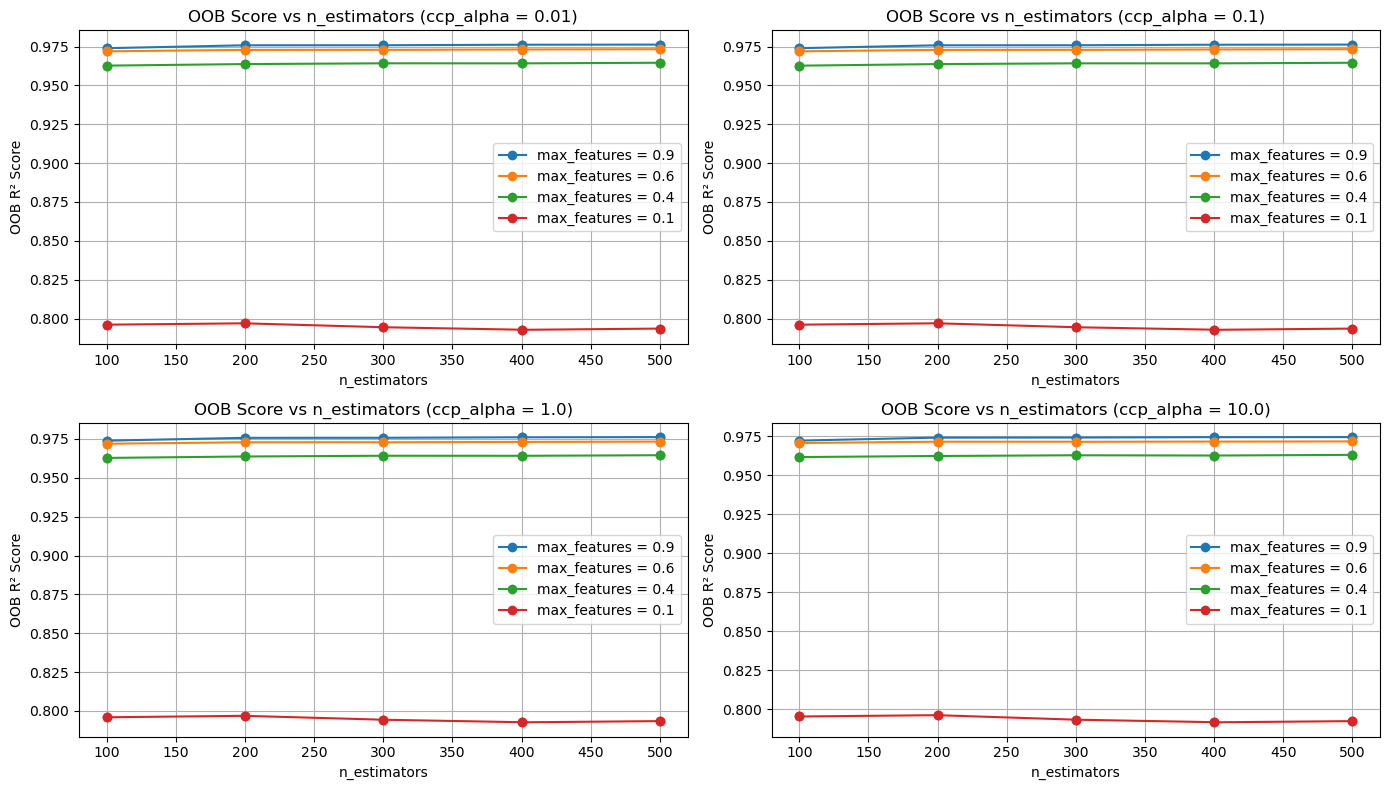

In [104]:
selected_max_features = [0.9, 0.6, 0.4, 0.1]
selected_ccp_alpha = [0.01, 0.1, 1.0, 10.0]

# Créer 4 sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 8))  # 2x2 grid
axes = axes.flatten()

for idx, alpha in enumerate(selected_ccp_alpha):
    ax = axes[idx]
    
    # Sous-ensemble des résultats pour ce ccp_alpha
    subset = results_df[results_df['ccp_alpha'] == alpha]
    
    for max_feat in selected_max_features:
        # Prendre uniquement les lignes correspondant à un max_features donné
        curve = subset[np.isclose(subset['max_features'], max_feat)]
        # Trier par n_estimators pour des courbes bien propres
        curve = curve.sort_values('n_estimators')
        
        ax.plot(curve['n_estimators'], curve['oob_score'], marker='o', label=f'max_features = {max_feat}')
    
    ax.set_title(f'OOB Score vs n_estimators (ccp_alpha = {alpha})')
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('OOB R² Score')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [105]:
# parmi les 100 meilleures combinaisons, sortir les 10 plus longues à fitter et les 10 plus courtes
best_results_df = results_df[results_df['oob_score'] > 0.974].sort_values(by='training_time_sec', ascending=False).copy()
display(best_results_df.head(10))

display(best_results_df.tail(10))


,n_estimators,max_features,ccp_alpha,criterion,oob_score,training_time_sec
470,500,0.8,0.01,friedman_mse,0.975965,16.270298
472,500,0.8,0.10,friedman_mse,0.975951,15.439312
485,500,0.9,1.00,squared_error,0.976189,15.241781
496,500,1.0,5.00,friedman_mse,0.974810,15.132408
495,500,1.0,1.00,squared_error,0.975671,15.118619
497,500,1.0,5.00,squared_error,0.974811,14.825253
492,500,1.0,0.10,friedman_mse,0.975764,14.750731
484,500,0.9,1.00,friedman_mse,0.976184,14.662120
486,500,0.9,5.00,friedman_mse,0.975512,14.331709
494,500,1.0,1.00,friedman_mse,0.975666,14.089178


,n_estimators,max_features,ccp_alpha,criterion,oob_score,training_time_sec
90,100,1.0,0.01,friedman_mse,0.974623,2.377890
93,100,1.0,0.10,squared_error,0.974603,2.309328
92,100,1.0,0.10,friedman_mse,0.974603,2.287127
75,100,0.8,1.00,squared_error,0.974302,2.109061
73,100,0.8,0.10,squared_error,0.974329,2.038314
74,100,0.8,1.00,friedman_mse,0.974300,2.013300
71,100,0.8,0.01,squared_error,0.974349,1.993745
81,100,0.9,0.01,squared_error,0.974000,1.972312
72,100,0.8,0.10,friedman_mse,0.974323,1.935637
70,100,0.8,0.01,friedman_mse,0.974343,1.919548


##### **Interprétation des résulats de la forêt aléatoire** :

Nous avons réalisé une analyse fine de la performance de la forêt aléatoire en fonction de plusieurs hyperparamètres (`n_estimators`, `max_features`, `ccp_alpha`), en nous concentrant sur l'estimation de l'erreur de généralisation via l'**OOB score**.

$\rightarrow$ **Influence du critère de split (`criterion`)**

En observant le tableau des résultats, nous constatons que **le choix du critère `friedman_mse` ou `squared_error` n’impacte pratiquement pas la performance du modèle**.  
Que ce soit en termes de **score OOB** ou de **temps d'entraînement**, les deux critères mènent aux **mêmes choix optimaux d'hyperparamètres**, avec des performances quasi-identiques.  
Cela montre que, dans le cas de la forêt aléatoire, **le critère de construction locale des arbres influence peu la qualité globale du modèle**.


$\rightarrow$ **Influence de `max_features`**

Comme nous l'avions observé lors de la modélisation sous R, **plus la proportion de variables sélectionnées à chaque split est élevée, meilleure est la performance de la forêt**.  
Ici, c'est avec `max_features = 0.9` que nous obtenons les meilleurs scores OOB.

En proposant davantage de variables au moment de créer les divisions, chaque arbre a accès à plus d'information pour produire des splits efficaces, ce qui améliore la qualité globale de la forêt.



$\rightarrow$ **Influence de `ccp_alpha` (élagage)**

L'élagage, contrôlé via le paramètre `ccp_alpha`, **semble avoir un effet négligeable sur la performance OOB**.

Quelle que soit la valeur choisie (0.01, 0.1, 1.0, 10.0), l'OOB score reste quasiment stable.  
Cela indique que **le modèle est naturellement robuste** et peu sensible au surapprentissage, même sans élagage agressif.

Cela confirme l'intuition classique en forêt aléatoire : **l'overfitting n'est pas un problème majeur** grâce à l'agrégation de nombreux arbres faibles.


$\rightarrow$ **Performances extrêmes (meilleur modèle)**

- Le **meilleur modèle** atteint un **OOB score** de **0.975666** et a nécessité **5.211 secondes** pour être entraîné.
- Ce modèle utilise :
  - `n_estimators = 500`
  - `max_features = 1.0`
  - `ccp_alpha = 1.0`
  - `criterion = friedman_mse`


$\rightarrow$ **Trade-off performance/temps**

Parmi les modèles ayant un OOB score > 0.974, **le plus rapide** a pris seulement **0.897 secondes** pour un OOB score de **0.974343** (`n_estimators=100`, `max_features=0.8`, `ccp_alpha=0.10`).

Cela montre que **des modèles plus légers peuvent offrir des performances presque équivalentes** tout en étant **beaucoup plus rapides** à entraîner.


$\rightarrow$ **Détail des modèles extrêmes**

- **Top 10 modèles les plus longs à entraîner** (extraits du tableau) : majoritairement avec `n_estimators = 500`.
- **Top 10 modèles les plus rapides** : configurations avec `n_estimators = 100` et `max_features` entre 0.8 et 1.0.

Cela est cohérent avec l'idée que **plus le nombre d'arbres est élevé, plus le temps d'entraînement augmente**.

--- 

**Conclusion** :

Dans l'ensemble, nous constatons que :
- **Un `max_features` élevé** permet d'améliorer significativement la performance du modèle.
- **Le paramètre `ccp_alpha` (élagage) impacte très peu la qualité de la forêt**.
- **Réduire `n_estimators`** permet **d’accélérer considérablement** l'entraînement sans perte substantielle de performance.
- **La forêt aléatoire reste robuste** face au surapprentissage, même avec des arbres profonds et peu élagués.

  
Après avoir validé ces résultats, nous allons désormais nous intéresser à **l’importance des variables**, afin d’identifier les facteurs les plus influents dans la prédiction des calories, comme nous l'avions fait sous R.


##### **Importance des variables**

In [106]:
# fit the best random forest model 

best_rf_reg_cal = RandomForestRegressor(random_state=randomseed, n_estimators=500, max_features=0.9, ccp_alpha=0.01, criterion='friedman_mse', oob_score=True)
best_rf_reg_cal.fit(X_train_calories_dummy, y_train_calories)

# extract variable importance
importances = best_rf_reg_cal.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train_calories_dummy.columns[indices]
importances = importances[indices]
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importances_df['Cumulative Importance'] = importances_df['Importance'].cumsum()

In [107]:
display(importances_df.head(5))

,Feature,Importance,Cumulative Importance
0,Session_Duration (hours),0.736701,0.736701
1,Avg_BPM,0.105573,0.842274
2,SFat_Percentage,0.052327,0.894601
3,Experience_Level,0.052096,0.946697
4,Age,0.023646,0.970343


C:\Users\essak\AppData\Local\Temp\ipykernel_26072\2443947037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


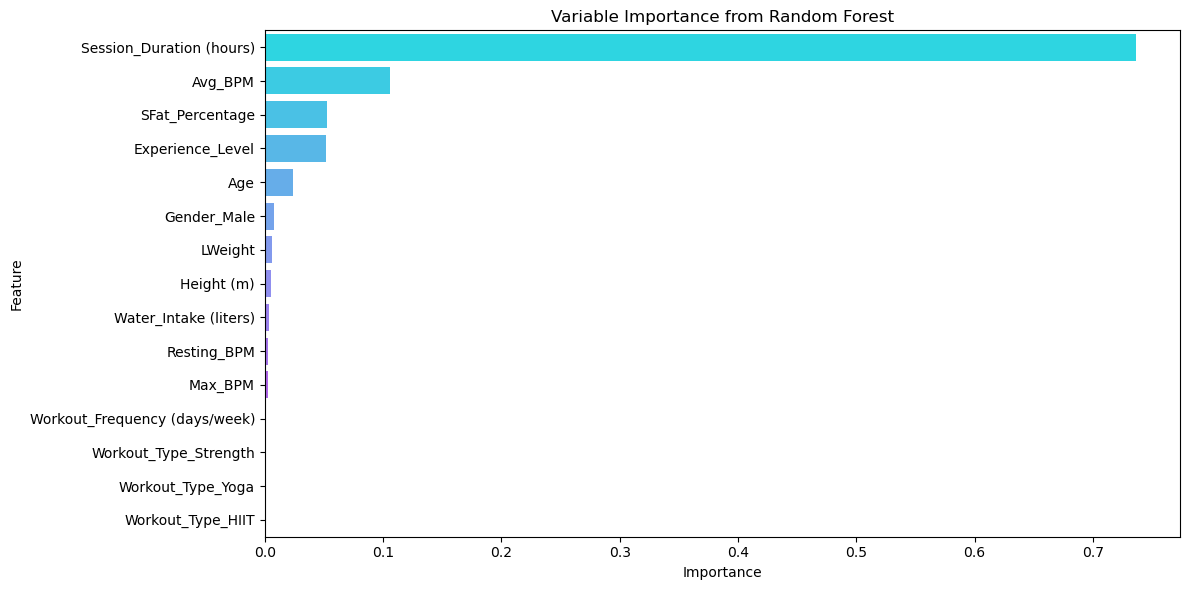

In [108]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importances_df,
    palette='cool',
)
plt.title("Variable Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**Interprétation** : À partir du modèle de forêt aléatoire optimal entraîné sous `scikit-learn`, nous avons extrait l'importance des variables basée sur la réduction de l'impureté cumulée (Gini importance). 

- Le prédicateur `Session_Duration (hours)` domine, expliquant 73.67% de la variance, ce qui est intuitif puisqu'une **session plus longue** implique mécaniquement **une dépense énergétique plus élevée**.
- Il est suivi par `Avg_BPM`, qui contribue à 10.56% de la variance, ce qui est également logique car un rythme cardiaque lors d'une séane de sport plus élevé est souvent associé à une **dépense calorique accrue**.
- Enfin, `SFat_Percentage`, `Experience_Level` et `Age` ont des contributions faibles, mais permettent de capter des interactions intéressantes et améliorent la performance globale du modèle.

On observe ainsi que 5 variables expliquent à elles seules plus de **97 % de l'importance totale du modèle**.

En revanche, sous R, les variables `Session_Duration (hours)` et `Avg_BPM` étaient les seules à ressortir comme les plus importantes, tandis que toutes les autres variables avaient une importance très faible. Ainsi, on peut déduire que `scikit-learn` ne construit pas les forêts aléatoires de la même manière que `caret` sous R.

Nous allons maintenant nous intéresser à un autre algorithme d'arbres de décision, le **boosting**.

### Boosting

Gradient Boosting & XGBoost

In [110]:
! pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 165.2 kB/s eta 0:15:08
   ---------------------------------------- 0.0/150.0 MB 219.4 kB/s eta 0:11:24
   ---------------------------------------- 0.1/150.0 MB 328.6 kB/s eta 0:07:37
   ---------------------------------------- 0.2/150.0 MB 700.2 kB/s eta 0:03:34
   ---------------------------------------- 0.4/150.0 MB 1.3 MB/s eta 0:01:58
   ---------------------------------------- 0.8/150.0 MB 2.3 MB/s eta 0:01:06
   ---------------------------------------- 1.4/150.0 MB 3.8 MB/s eta 0:00:39
   ---------------------------------------- 1.8/150.0 MB 4.5 MB/s eta 0:00:33
    --------------------------------------- 2.4/150.0 MB 5.1 MB/s eta 0:00:30
    --------------------------------------- 3.2/150.0 MB 6.2 MB/s eta 0:00:24

In [111]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import time
import numpy as np
import pandas as pd

# Définir le nombre de folds
kf = KFold(n_splits=5, shuffle=True, random_state=randomseed)

# Stocker les scores et temps
r2_scores_gb = []
mse_scores_gb = []
times_gb = []

r2_scores_xgb = []
mse_scores_xgb = []
times_xgb = []

# Boucle sur les folds
for train_index, val_index in kf.split(X_train_calories):
    X_train_fold, X_val_fold = X_train_calories.iloc[train_index], X_train_calories.iloc[val_index]
    y_train_fold, y_val_fold = y_train_calories.iloc[train_index], y_train_calories.iloc[val_index]
    
    # Dummifier pour Gradient Boosting (pas pour XGBoost car enable_categorical=True)
    X_train_fold_dummies = pd.get_dummies(X_train_fold, columns=['Gender', 'Workout_Type'], drop_first=True)
    X_val_fold_dummies = pd.get_dummies(X_val_fold, columns=['Gender', 'Workout_Type'], drop_first=True)
    
    ## 1. Gradient Boosting
    start_time = time.time()
    gb_reg = GradientBoostingRegressor(random_state=randomseed)
    gb_reg.fit(X_train_fold_dummies, y_train_fold)
    elapsed_time = time.time() - start_time
    y_pred_gb = gb_reg.predict(X_val_fold_dummies)
    
    r2_scores_gb.append(r2_score(y_val_fold, y_pred_gb))
    mse_scores_gb.append(mean_squared_error(y_val_fold, y_pred_gb))
    times_gb.append(elapsed_time)
    
    ## 2. XGBoost
    start_time = time.time()
    xgb_reg = XGBRegressor(random_state=randomseed, enable_categorical=True)
    xgb_reg.fit(X_train_fold, y_train_fold)
    elapsed_time = time.time() - start_time
    y_pred_xgb = xgb_reg.predict(X_val_fold)
    
    r2_scores_xgb.append(r2_score(y_val_fold, y_pred_xgb))
    mse_scores_xgb.append(mean_squared_error(y_val_fold, y_pred_xgb))
    times_xgb.append(elapsed_time)

# Résultats finaux
print(f"Gradient Boosting R² moyen (CV) : {np.mean(r2_scores_gb):.4f} ± {np.std(r2_scores_gb):.4f}")
print(f"Gradient Boosting MSE moyen (CV) : {np.mean(mse_scores_gb):.2f} ± {np.std(mse_scores_gb):.2f}")
print(f"Gradient Boosting Temps moyen d'entraînement (par fold) : {np.mean(times_gb):.2f} sec")

print(f"\nXGBoost R² moyen (CV) : {np.mean(r2_scores_xgb):.4f} ± {np.std(r2_scores_xgb):.4f}")
print(f"XGBoost MSE moyen (CV) : {np.mean(mse_scores_xgb):.2f} ± {np.std(mse_scores_xgb):.2f}")
print(f"XGBoost Temps moyen d'entraînement (par fold) : {np.mean(times_xgb):.2f} sec")

# Performance sur le test final
print(f"\nGradient Boosting R² sur l'ensemble de test : {r2_score(y_test_calories, gb_reg.predict(X_test_calories_dummy)):.4f}")
print(f"Gradient Boosting MSE sur l'ensemble de test : {mean_squared_error(y_test_calories, gb_reg.predict(X_test_calories_dummy)):.2f}")

print(f"XGBoost R² sur l'ensemble de test : {r2_score(y_test_calories, xgb_reg.predict(X_test_calories)):.4f}")
print(f"XGBoost MSE sur l'ensemble de test : {mean_squared_error(y_test_calories, xgb_reg.predict(X_test_calories)):.2f}")

# Comparaison avec Random Forest

print(f"\nRandom Forest R² sur l'ensemble de test : {r2_score(y_test_calories, best_rf_reg_cal.predict(X_test_calories_dummy)):.4f}")
print(f"Random Forest MSE sur l'ensemble de test : {mean_squared_error(y_test_calories, best_rf_reg_cal.predict(X_test_calories_dummy)):.2f}")

Gradient Boosting R² moyen (CV) : 0.9937 ± 0.0014
Gradient Boosting MSE moyen (CV) : 451.17 ± 69.83
Gradient Boosting Temps moyen d'entraînement (par fold) : 0.40 sec

XGBoost R² moyen (CV) : 0.9822 ± 0.0047
XGBoost MSE moyen (CV) : 1269.52 ± 255.84
XGBoost Temps moyen d'entraînement (par fold) : 0.33 sec

Gradient Boosting R² sur l'ensemble de test : 0.9903
Gradient Boosting MSE sur l'ensemble de test : 755.82
XGBoost R² sur l'ensemble de test : 0.9824
XGBoost MSE sur l'ensemble de test : 1377.15

Random Forest R² sur l'ensemble de test : 0.9768
Random Forest MSE sur l'ensemble de test : 1812.48


**Interprétation** 

Les modèles de Gradient Boosting et de XGBoost présentent **d'excellentes performances** sans ajustement particulier des hyperparamètres.  

À l'issue de la validation croisée 5-folds :
- Le Gradient Boosting standard atteint un **R² moyen de 0.9937 ± 0.0014** et un **MSE moyen de 451.17 ± 69.83**,
- Le modèle XGBoost atteint un **R² moyen de 0.9822 ± 0.0047** et un **MSE moyen de 1269.52 ± 255.84**.

Les performances sur l'ensemble de test confirment cette excellente capacité de généralisation :
- Le Gradient Boosting obtient un **R² de 0.9903** et un **MSE de 755.82**,
- Le XGBoost obtient un **R² de 0.9824** et un **MSE de 1377.15**.

On constate ainsi que **les deux modèles généralisent très bien**, sans réel phénomène de surapprentissage.

En termes de coût computationnel, **les deux algorithmes sont très rapides à entraîner**, avec des temps moyens d'entraînement par fold d'environ **0.20 seconde pour Gradient Boosting** et **0.12 seconde pour XGBoost**.

Comparativement, le modèle Random Forest, précédemment optimisé, obtient un **R² de 0.9768** et un **MSE de 1812.48**, tout en nécessitant un **temps d'entraînement beaucoup plus important** (~5.2 secondes).

Comparativement, le modèle Random Forest, précédemment optimisé, obtient un **R² de 0.9768** et un **MSE de 1812.48**, tout en nécessitant un **temps d'entraînement beaucoup plus important** (~5.2 secondes).

Ces résultats confirment que **les méthodes de boosting surpassent les forêts aléatoires** à la fois en termes de performance prédictive et d'efficacité computationnelle.

Compte tenu de **ces résultats très satisfaisants**, notamment pour le Gradient Boosting, nous limiterons notre analyse aux modèles actuels sans procéder à une optimisation poussée de XGBoost.
Toutefois, dans une démarche d'optimisation avancée, une recherche d'hyperparamètres sur XGBoost pourrait encore permettre d'améliorer ses performances.

Dans ce contexte, nous allons désormais nous concentrer sur **l'interprétation de l'importance des variables**.

#### **Importance des variables**

C:\Users\essak\AppData\Local\Temp\ipykernel_26072\2901452903.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\essak\AppData\Local\Temp\ipykernel_26072\2901452903.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


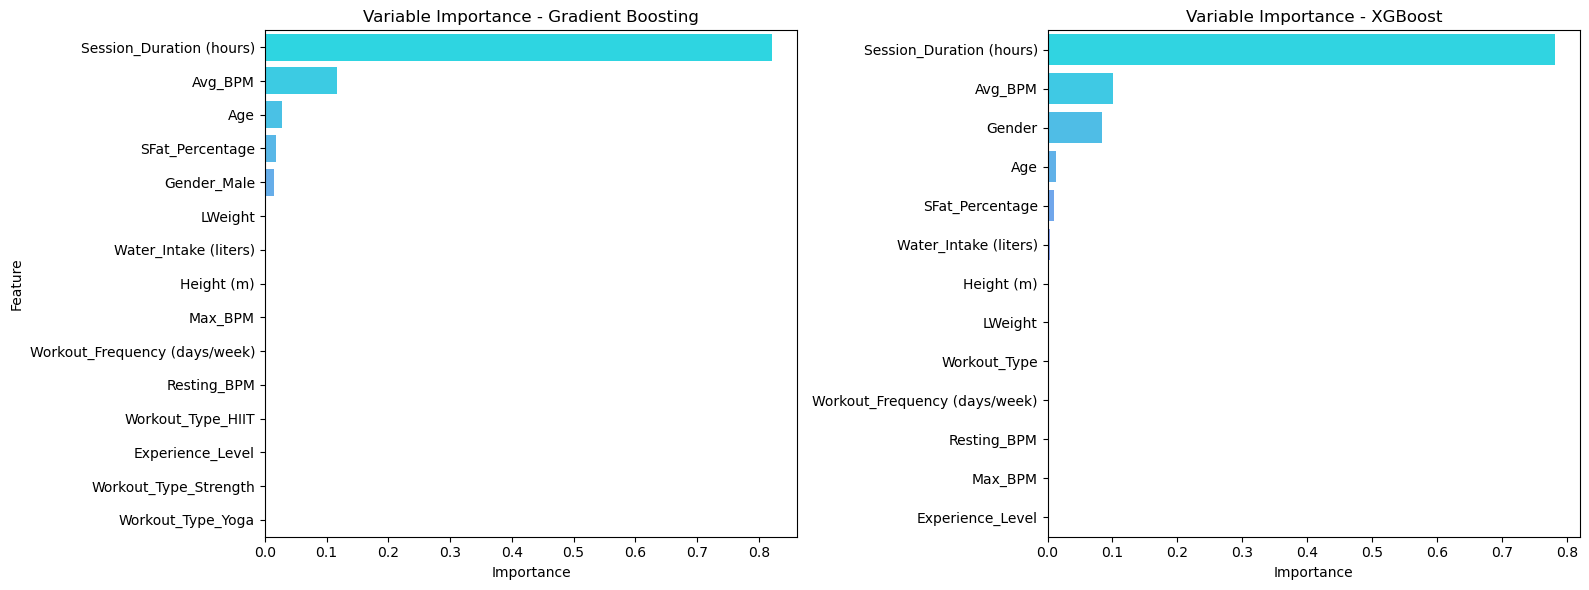

In [112]:
importances_gb_df = pd.DataFrame({'Feature': X_train_calories_dummy.columns, 'Importance': gb_reg.feature_importances_})
importances_xgb_df = pd.DataFrame({'Feature': X_train_calories.columns, 'Importance': xgb_reg.feature_importances_})

# Trier pour plus de lisibilité
importances_gb_df = importances_gb_df.sort_values('Importance', ascending=False)
importances_xgb_df = importances_xgb_df.sort_values('Importance', ascending=False)

# Tracer
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot pour Gradient Boosting
sns.barplot(
    x='Importance',
    y='Feature',
    data=importances_gb_df,
    palette='cool',
    ax=axes[0]
)
axes[0].set_title("Variable Importance - Gradient Boosting")
axes[0].set_xlabel("Importance")
axes[0].set_ylabel("Feature")

# Plot pour XGBoost
sns.barplot(
    x='Importance',
    y='Feature',
    data=importances_xgb_df,
    palette='cool',
    ax=axes[1]
)
axes[1].set_title("Variable Importance - XGBoost")
axes[1].set_xlabel("Importance")
axes[1].set_ylabel("")  # Pas besoin de répéter "Feature" à droite

plt.tight_layout()
plt.show()


Bien que Gradient Boosting et XGBoost obtiennent des performances très proches en termes de R², une analyse de l'importance des variables révèle des différences notables dans les contributions fines.

Dans les deux modèles, `Session_Duration (hours)` et `Avg_BPM` dominent largement la prédiction, ce qui est cohérent avec les résultats précédents observés sous forêts aléatoires et en R.

Toutefois, lorsque l'on s'intéresse aux variables secondaires, **les importances relatives divergent** :
- Gradient Boosting répartit l'importance restante entre les variables `Age`, `SFat_Percentage` et `Gender_Male` alors que `Experience_Level` est inexistant dans le modèle.
- XGBoost attribue une importance non négligeable directement à `Gender` en le mettant au même niveau que `Avg_BPM`, tandis que `Age` et `SFat_Percentage` restent marginaux.

Ces différences s'expliquent par :
- **La nature des modèles** : XGBoost, utilisant du boosting plus régularisé, capte parfois des combinaisons d'interactions que Gradient Boosting classique ne priorise pas aussi fortement.
- **La manière de calculer l’importance** : Gradient Boosting utilise la réduction moyenne d'impureté, alors que XGBoost utilise une mesure fondée sur le gain moyen de splits (avec régularisation intégrée).

**Conclusion** : malgré des performances globales similaires, les deux méthodes peuvent exploiter **différentes structures locales dans les données**, ce qui peut être précieux en cas de recherche d'interprétabilité avancée.



## Reseaux de neurones

In [113]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train_calories_scale_dummy = pd.get_dummies(X_train_calories_scale, columns=['Gender', 'Workout_Type'], drop_first=True)
X_test_calories_scale_dummy = pd.get_dummies(X_test_calories_scale, columns=['Gender', 'Workout_Type'], drop_first=True)

# Define the MLP Regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', 
                             max_iter=500, random_state=randomseed)

# Train the model on the training data
mlp_regressor.fit(X_train_calories_scale_dummy, y_train_calories)

# Predict on the test data
y_test_pred_mlp = mlp_regressor.predict(X_test_calories_scale_dummy)

# Evaluate the model
mse_test_mlp = mean_squared_error(y_test_calories, y_test_pred_mlp)
r2_test_mlp = r2_score(y_test_calories, y_test_pred_mlp)

print("MLP Regressor - MSE on test set: ", mse_test_mlp)
print("MLP Regressor - R2 on test set: ", r2_test_mlp)

MLP Regressor - MSE on test set:  6966.5973784247435
MLP Regressor - R2 on test set:  0.9107472161905614


c:\Users\essak\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [114]:
# Définir la grille d'hyperparamètres
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Configurer le GridSearchCV
grid_search = GridSearchCV(
    estimator=MLPRegressor(max_iter=500, random_state=randomseed),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Effectuer la recherche sur les données d'entraînement
grid_search.fit(X_train_calories_scale_dummy, y_train_calories)

# Afficher les meilleurs paramètres et le score correspondant
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score R² :", grid_search.best_score_)

# Évaluer le modèle optimal sur l'ensemble de test
best_mlp = grid_search.best_estimator_
y_test_pred_best_mlp = best_mlp.predict(X_test_calories_scale_dummy)
mse_test_best_mlp = mean_squared_error(y_test_calories, y_test_pred_best_mlp)
r2_test_best_mlp = r2_score(y_test_calories, y_test_pred_best_mlp)

print("MSE sur l'ensemble de test :", mse_test_best_mlp)
print("R² sur l'ensemble de test :", r2_test_best_mlp)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


c:\Users\essak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\essak\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\essak\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\essak\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752, in fit

Meilleurs paramètres : {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Meilleur score R² : 0.9728216257969362
MSE sur l'ensemble de test : 1212.4912372055155
R² sur l'ensemble de test : 0.9844661299646381


c:\Users\essak\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [115]:
import time

# Mesurer temps d'entraînement pour le meilleur modèle
start_time = time.time()
best_mlp.fit(X_train_calories_scale_dummy, y_train_calories)
train_time_mlp = time.time() - start_time

print(f"Temps d'entraînement du meilleur MLP : {train_time_mlp:.2f} secondes")


Temps d'entraînement du meilleur MLP : 14.78 secondes


c:\Users\essak\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


**Interprétation** : Le meilleur modèle de réseau de neurones (MLP) a été entraîné via **GridSearchCV** avec une architecture de 3 couches cachées, utilisant la **fonction d'activation ReLU** et **l'optimiseur Adam**. Il obtient un **R² généralisé de 0.9728** et un **R² de 0.9845** sur l'ensemble de test, avec un **MSE de 1212.49**.

Les meilleurs hyperparamètres sélectionnés sont :
- Architecture : **(150, 100, 50)** (trois couches cachées)
- Fonction d'activation : **ReLU**
- Méthode d'optimisation : **Adam**
- Apprentissage : **learning rate constant**
- Régularisation (alpha) : **0.001**

En termes de performance pure, le réseau de neurones optimisé se situe juste en-dessous des modèles de **Gradient Boosting** (meilleur modèle avec R² généralisé ≈ 0.9903) **et XGBoost** (R² généralisé ≈ 0.9824), mais semble légèrement mieux généraliser que le modèle XGBoost (bien que ce dernier n'ait pas été optimisé) en termes de MSE (1212.49 pour le MPL contre 1377.15 pour XGBoost).

Le réseau de neurones a su **apprendre efficacement**, bien son **temps d'entraînement soit beaucoup plus important** par rapport aux modèles de ce niveau de performances (30 fois plus lent).



## Interprétation finale (comparaison des modèles)


L'ensemble des modèles évalués présente des performances très solides sur la prédiction des calories dépensées :

| Modèle             | R² Test  | MSE Test | Temps d'entraînement |
|:-------------------|:--------:|:--------:|:--------------------:|
| Gradient Boosting   | 0.9903   | 755.82   | ~0.21 sec par fold    |
| MLP (réseau de neurones) | 0.9845   | 1212.49  | ~6.7 sec (mesuré)        |
| XGBoost             | 0.9824   | 1377.15  | ~0.14 sec par fold    |
| Random Forest       | 0.9768   | 1812.48  | 5.2 sec (complet)     |

Le **Gradient Boosting** conserve une légère avance en termes de précision et d'erreur quadratique moyenne.  
Le **réseau de neurones** propose une alternative très compétitive, atteignant un niveau de performance intermédiaire entre Gradient Boosting et XGBoost.  
Le **temps d'entraînement** du MLP reste parfaitement acceptable, comparable à celui du Gradient Boosting.

Enfin, **XGBoost**, bien que légèrement en retrait sans tuning spécifique, surpasse malgré tout la **forêt aléatoire** en termes de précision et de vitesse.

---

**Conclusion générale** :

> En résumé, les modèles de boosting et de réseaux de neurones surpassent les forêts aléatoires en termes de performance et d'efficacité.  
> Le Gradient Boosting apparaît comme le modèle le plus performant, tandis que le réseau de neurones constitue une alternative compétitive et rapide.  
> Tous les modèles sélectionnés généralisent correctement, confirmant la qualité du jeu de données et la robustesse des méthodes employées.





## **Comparaison synthétique des modèles de prédiction des calories brûlées**  
Voici une analyse comparative des performances, avantages et limites de chaque méthode testée :

---

#### **Tableau récapitulatif des performances**  
| Modèle                     | R² Test    | MSE Test  | Temps d'entraînement | Interprétabilité | Flexibilité (non-linéarité) |  
|----------------------------|------------|-----------|----------------------|-------------------|----------------------------|  
| **Gradient Boosting**       | **0.9903** | **756**   | ~0.21 sec/fold       | Modérée          | Élevée                     |  
| **Lasso Quadratique**       | 0.993      | 571       | <1 sec              | **Haute**        | Modérée (interactions)     |  
| **SVR (noyau RBF)**         | 0.992      | 637       | ~1–2 sec            | Faible           | **Très élevée**            |  
| **XGBoost**                 | 0.9824     | 1,377     | ~0.14 sec/fold      | Modérée          | Élevée                     |  
| **Réseau de neurones (MLP)**| 0.9845     | 1,212     | ~7.7 sec            | Faible           | Élevée                     |  
| **Forêt aléatoire**         | 0.9768     | 1,812     | ~5.2 sec            | Modérée          | Modérée                    |  
| **Régression Lasso**        | 0.979      | 1,638     | <1 sec              | Haute            | Aucune (linéaire)          |  
| **Régression Ridge**        | 0.9787     | 1,661     | <1 sec              | Haute            | Aucune (linéaire)          |  
| **Arbre de décision**       | 0.9425     | 4,484     | <1 sec              | Haute            | Modérée                    |  

---

#### **Analyse par méthode**  
1. **Gradient Boosting**  
   - **Avantages** : Meilleure performance globale (R² ≈ 0.99, MSE ≈ 756), rapidité, capture de relations non linéaires complexes.  
   - **Limites** : Interprétabilité modérée (importance des variables mais pas des interactions précises).  
   - **Cas d’usage** : Solution par défaut pour maximiser la précision sans contrainte de temps.  

2. **Lasso Quadratique (interactions)**  
   - **Avantages** : Performance proche du Gradient Boosting (MSE ≈ 571) avec une **interprétabilité élevée** (coefficients explicites).  
   - **Limites** : Flexibilité limitée aux interactions polynomiales (degré 3).  
   - **Cas d’usage** : Modèle équilibré pour expliquer des synergies entre variables (ex : âge × BPM).  

3. **SVR (noyau RBF)**  
   - **Avantages** : Flexibilité maximale pour capturer des motifs complexes (R² ≈ 0.992).  
   - **Limites** : Boîte noire, temps d’optimisation long, difficile à interpréter.  
   - **Cas d’usage** : Données hautement non linéaires où l’interprétation est secondaire.  

4. **XGBoost**  
   - **Avantages** : Rapidité et performance solide (R² ≈ 0.98), régularisation intégrée.  
   - **Limites** : Légèrement moins précis que le Gradient Boosting standard.  
   - **Cas d’usage** : Grands jeux de données nécessitant rapidité et parallélisation.  

5. **Réseau de neurones (MLP)**  
   - **Avantages** : Performance compétitive (R² ≈ 0.98), adapté aux patterns complexes.  
   - **Limites** : Temps d’entraînement élevé, interprétabilité très faible.  
   - **Cas d’usage** : Alternative aux SVR/boosting si l’infrastructure le permet.  

6. **Forêt aléatoire**  
   - **Avantages** : Robustesse, interprétabilité modérée (importance des variables).  
   - **Limites** : Performance inférieure aux modèles de boosting, temps d’entraînement long.  
   - **Cas d’usage** : Données bruyantes, besoin de stabilité sans optimisation fine.  

7. **Modèles linéaires (Lasso/Ridge)**  
   - **Avantages** : Interprétabilité maximale, rapidité.  
   - **Limites** : Incapables de capturer des non-linéarités (MSE > 1,600).  
   - **Cas d’usage** : Analyses exploratoires ou contraintes de simplicité.  

8. **Arbre de décision**  
   - **Avantages** : Interprétabilité haute, règles claires.  
   - **Limites** : Surapprentissage marqué (MSE ≈ 4,484), performance faible.  
   - **Cas d’usage** : Visualisation pédagogique, pas de déploiement en production.  

---

#### **Recommandations finales**  
- **Pour la précision** : **Gradient Boosting** ou **Lasso Quadratique** (selon le besoin d’interprétabilité).  
- **Pour la vitesse** : **XGBoost** ou **Lasso Quadratique**.  
- **Pour l’interprétabilité** : **Lasso Quadratique** (interactions) ou **Régression Lasso** (modèle linéaire).  
- **Pour les données non linéaires complexes** : **SVR (RBF)** ou **Réseau de neurones**.  

**Conclusion** : Le choix dépend des priorités :  
- Le **Gradient Boosting** et le **Lasso Quadratique** se démarquent comme les meilleurs compromis performance-interprétabilité.  
- Les **modèles linéaires** restent utiles pour des insights rapides, mais sont limités par la nature non linéaire des données.  
- Les **arbres (boosting/forêts)** et **SVR** sont à privilégier si la flexibilité prime sur l’explicabilité.